In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import calplot

# Assignment 1
## A1 Part 1: Visualizing patterns in the data
This assignment deals with SF crme fata from January 1st 2003 to December 31st 2017. The full dataset consists of a total of 2129525 incidents from  37 different categories of crime. 

In [2]:
df = pd.read_csv("data.csv")

However,  in this sub-assignment, the focus will just be on the following 14 categories of crimes: 

In [3]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

In [4]:
f = df[df['Category'].isin(focuscrimes)]
f = f.copy()

1. In order to get an overview of the focuscrimes, a few different barcharts will be plotted; week-day plots, the months, the 24-hour cycle, and the 168 hours of the week. This will help get a better visualisation and observe any trends and patterns within the categories that might be interesting

As the assignment deals with temporal data, the the 'Date' and 'Time' columns are converted to datetime. Then month and hour components are extracted and two new columns 'Month' and 'Hour' are added to the dataframe: 

In [5]:
f['Month'] = pd.to_datetime(f['Date']).dt.month
f['Hour'] = pd.to_datetime(f['Time'], format = '%H:%M').dt.hour

**Weekly Patterns**

/var/folders/fk/jf1n3p615pj42c3yn8qkk3b80000gn/T/ipykernel_69114/2757337662.py:32: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=3.0)
/var/folders/fk/jf1n3p615pj42c3yn8qkk3b80000gn/T/ipykernel_69114/2757337662.py:32: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=3.0)
/var/folders/fk/jf1n3p615pj42c3yn8qkk3b80000gn/T/ipykernel_69114/2757337662.py:32: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=3.0)
/var/folders/fk/jf1n3p615pj42c3yn8qkk3b80000gn/T/ipykernel_69114/2757337662.py:32: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=3.0)
/var/folders/fk/jf1n3p615pj42c3yn8qkk3b80000gn/T/ipykernel_69114/2757337662.py:32: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=3.0)
/var/folders/fk/jf1n3p615pj42c3yn8qkk3b80000gn/T/ipykernel_69114/2757337662.py:32: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=3.0)
/var/folders/fk/jf1n3p

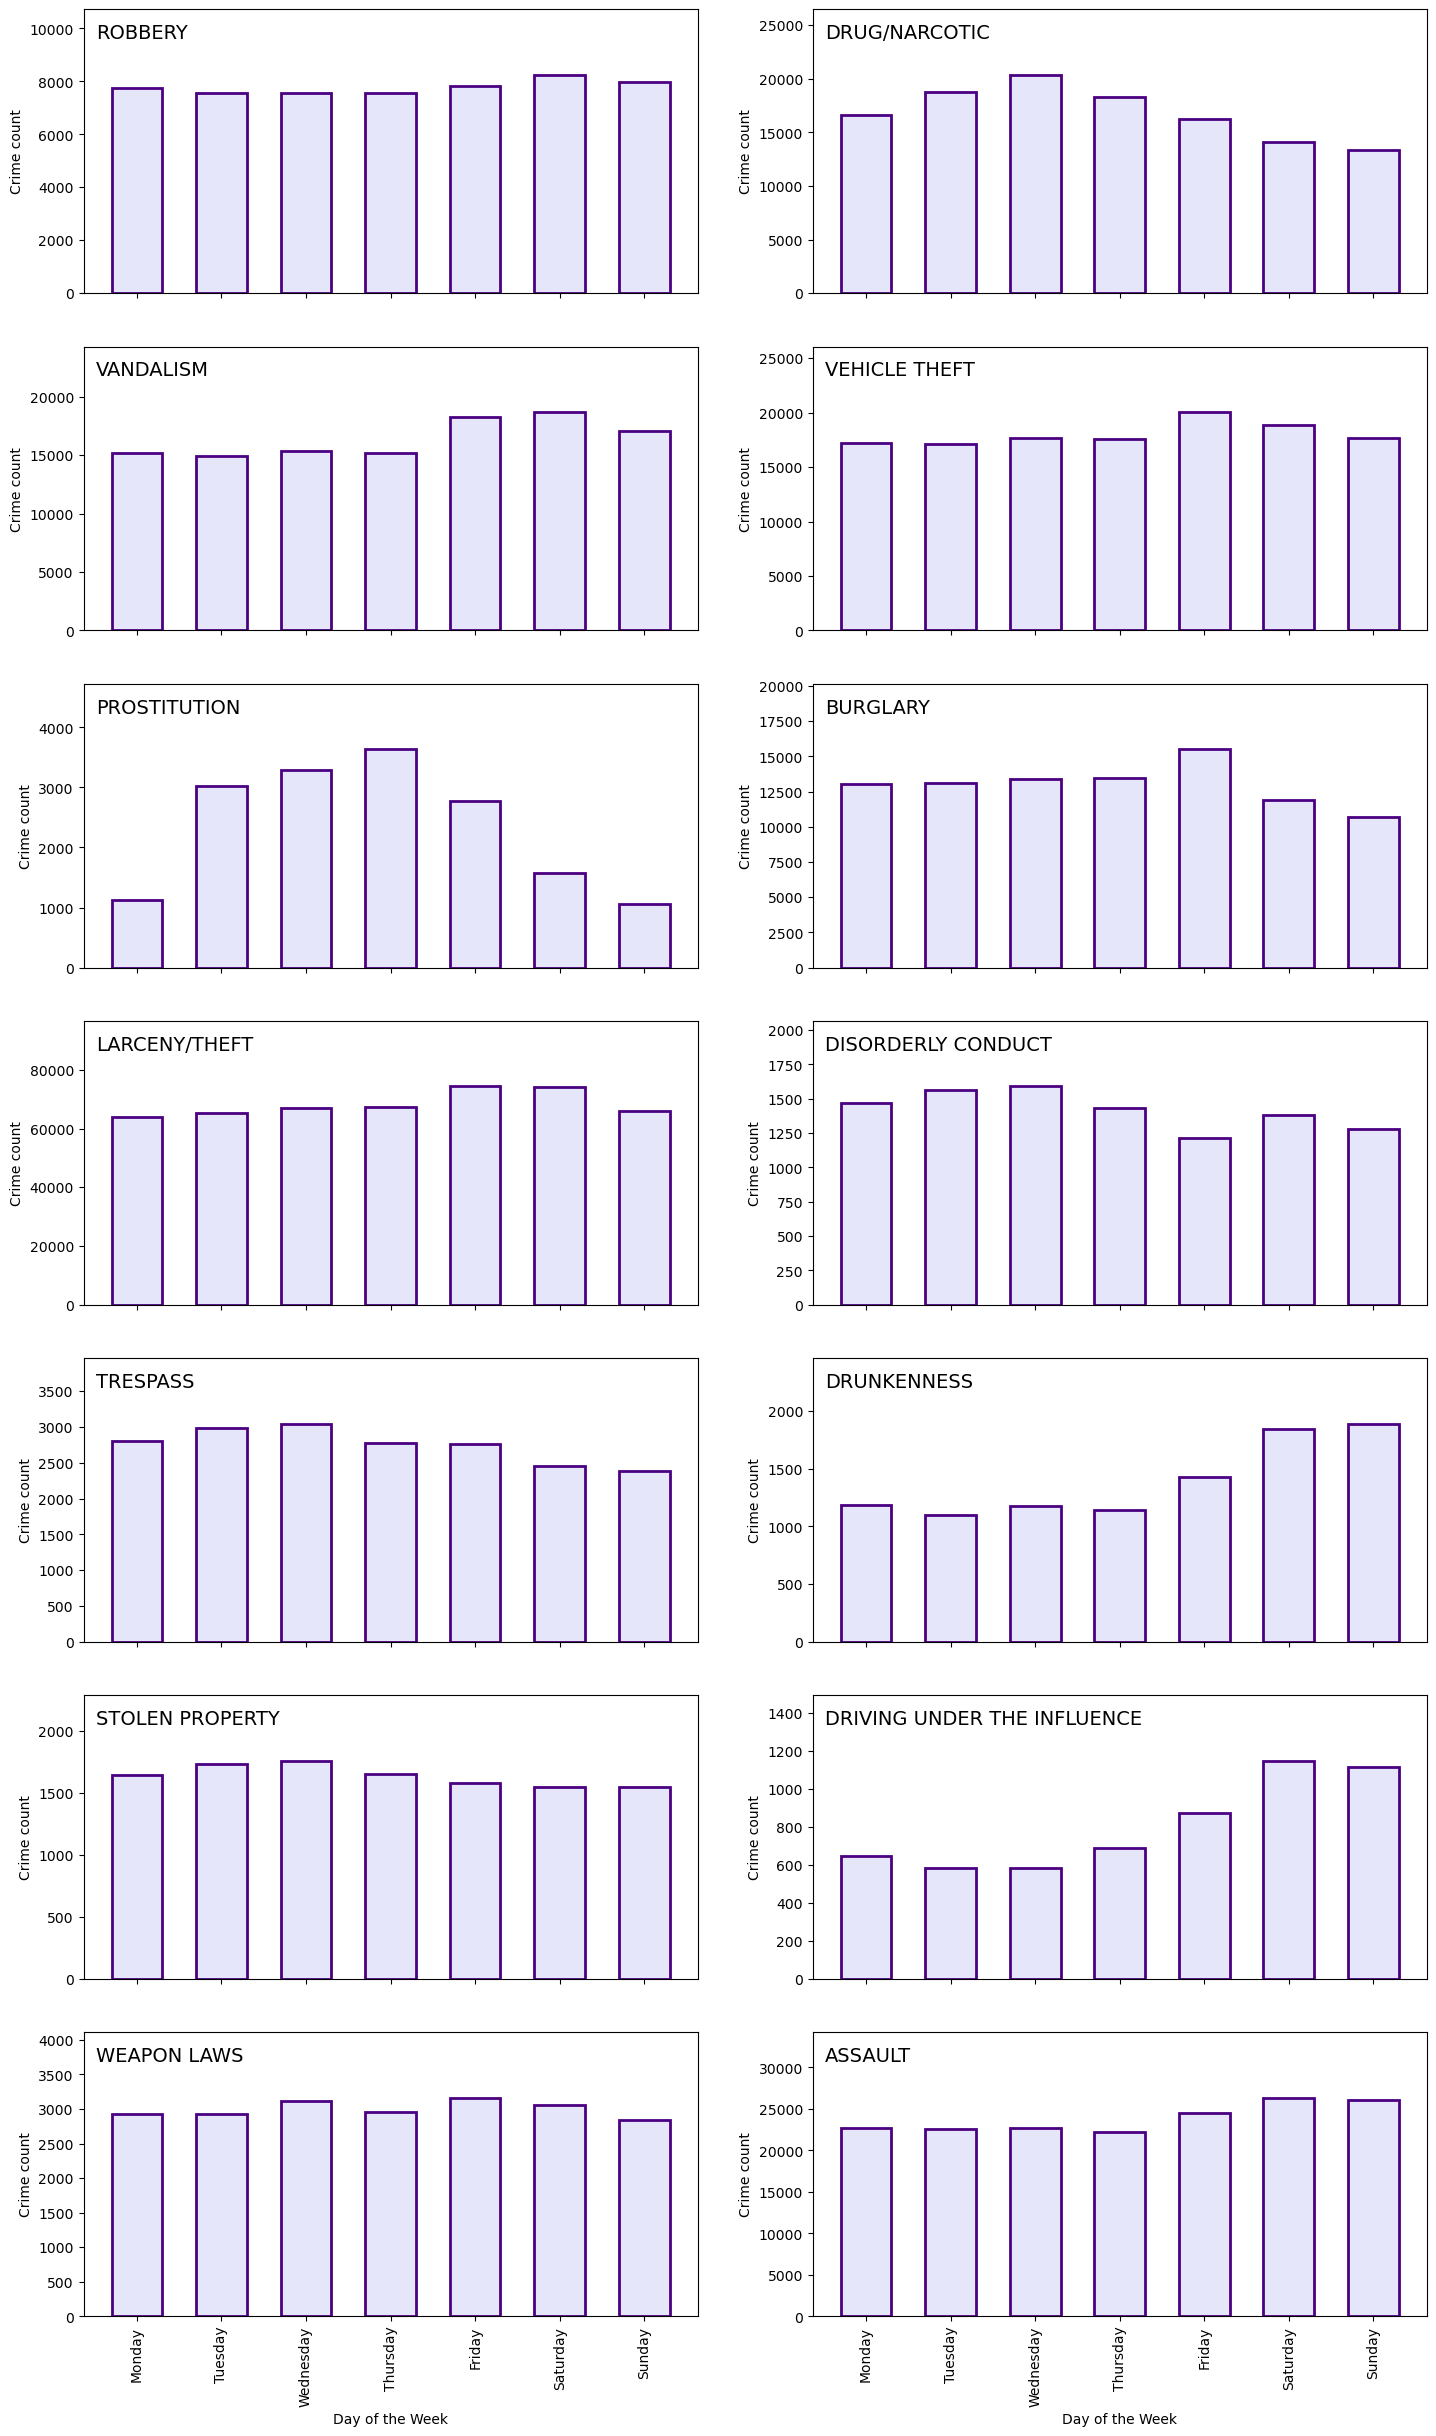

In [6]:
plt.figure(figsize = (15,25))
weekdays_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for i, crime in enumerate(focuscrimes, start =1):
    ax = plt.subplot(7, 2, i)
    f_temp =f[f['Category'] == crime]

    counts = f_temp['DayOfWeek'].value_counts().reindex(weekdays_order)
    
    for j, day in enumerate(weekdays_order):
        ax.bar(j, counts.loc[day], color='lavender', edgecolor = 'indigo', linewidth = 2, width=0.6)

    x = np.arange(len(weekdays_order))
    ax.set_xticks(x)
    ax.set_xticklabels(weekdays_order, rotation=90)
    ax.set_ylabel('Crime count')
    
    y_max = f_temp['DayOfWeek'].value_counts().max()
    ax.set_ylim(top=y_max * 1.3)  
    
    ax.text(0.02, 0.95, f'{crime}', transform=ax.transAxes, 
            horizontalalignment='left', verticalalignment='top', 
            fontsize=14 )

    if i > 12:
        ax.set_xlabel('Day of the Week')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    else:
        ax.set_xlabel('')
        ax.set_xticklabels([])

    plt.tight_layout(pad=3.0)

plt.show()

The plots above represent the weekday distribution of focus crimes. It is important to note that the zoom level on the y-axis varies for different crime categories due to considerable differences in the total number of incidents within each category. To provide a clearer overview of the weekday trends and relative changes in the number of incidents for each crime category, the y-axis zoom level is adjusted accordingly. And this also follows for the monthly and hourly trends that are plotted further ahead of the report. 

It is evident that for most categories, there is no significant relative change in the total number of reported incidents on different weekdays. Most categories exhibit a consistent trend, with slight increases or decreases during the weekend, which aligns with intuition based on the category. However, there were some interesting observations that warrant further attention: 
- *Prostitution:* rThe number of reported incidents is relatively low during the weekend and Mondays, increasing towards the middle of the week, with a peak on Thursdays. 
- *Drunkenness:* As expected, the reported number of incidents shows an increasing trend towards the weekend. The plot indicates significantly higher incidents during Saturdays and Sundays. However, it's worth noting that the morning hours primarily contribute to the height of the Sunday bar. (Hourly trends will be analyzed later in the report to further examine this aspect.)
- *Driving under the influence:* Follows a similar trend to drunkenness, albeit with fewer incidents each day, which is expected.
- *Drug/narcotic:* Exhibits an increasing trend towards the middle of the week, peaking on Wednesdays and dropping significantly towards the weekend. This observation was unexpected.

**Monthly Patterns**

/var/folders/fk/jf1n3p615pj42c3yn8qkk3b80000gn/T/ipykernel_69114/1260041138.py:33: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=4.0)
/var/folders/fk/jf1n3p615pj42c3yn8qkk3b80000gn/T/ipykernel_69114/1260041138.py:33: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=4.0)
/var/folders/fk/jf1n3p615pj42c3yn8qkk3b80000gn/T/ipykernel_69114/1260041138.py:33: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=4.0)
/var/folders/fk/jf1n3p615pj42c3yn8qkk3b80000gn/T/ipykernel_69114/1260041138.py:33: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=4.0)
/var/folders/fk/jf1n3p615pj42c3yn8qkk3b80000gn/T/ipykernel_69114/1260041138.py:33: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=4.0)
/var/folders/fk/jf1n3p615pj42c3yn8qkk3b80000gn/T/ipykernel_69114/1260041138.py:33: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=4.0)
/var/folders/fk/jf1n3p

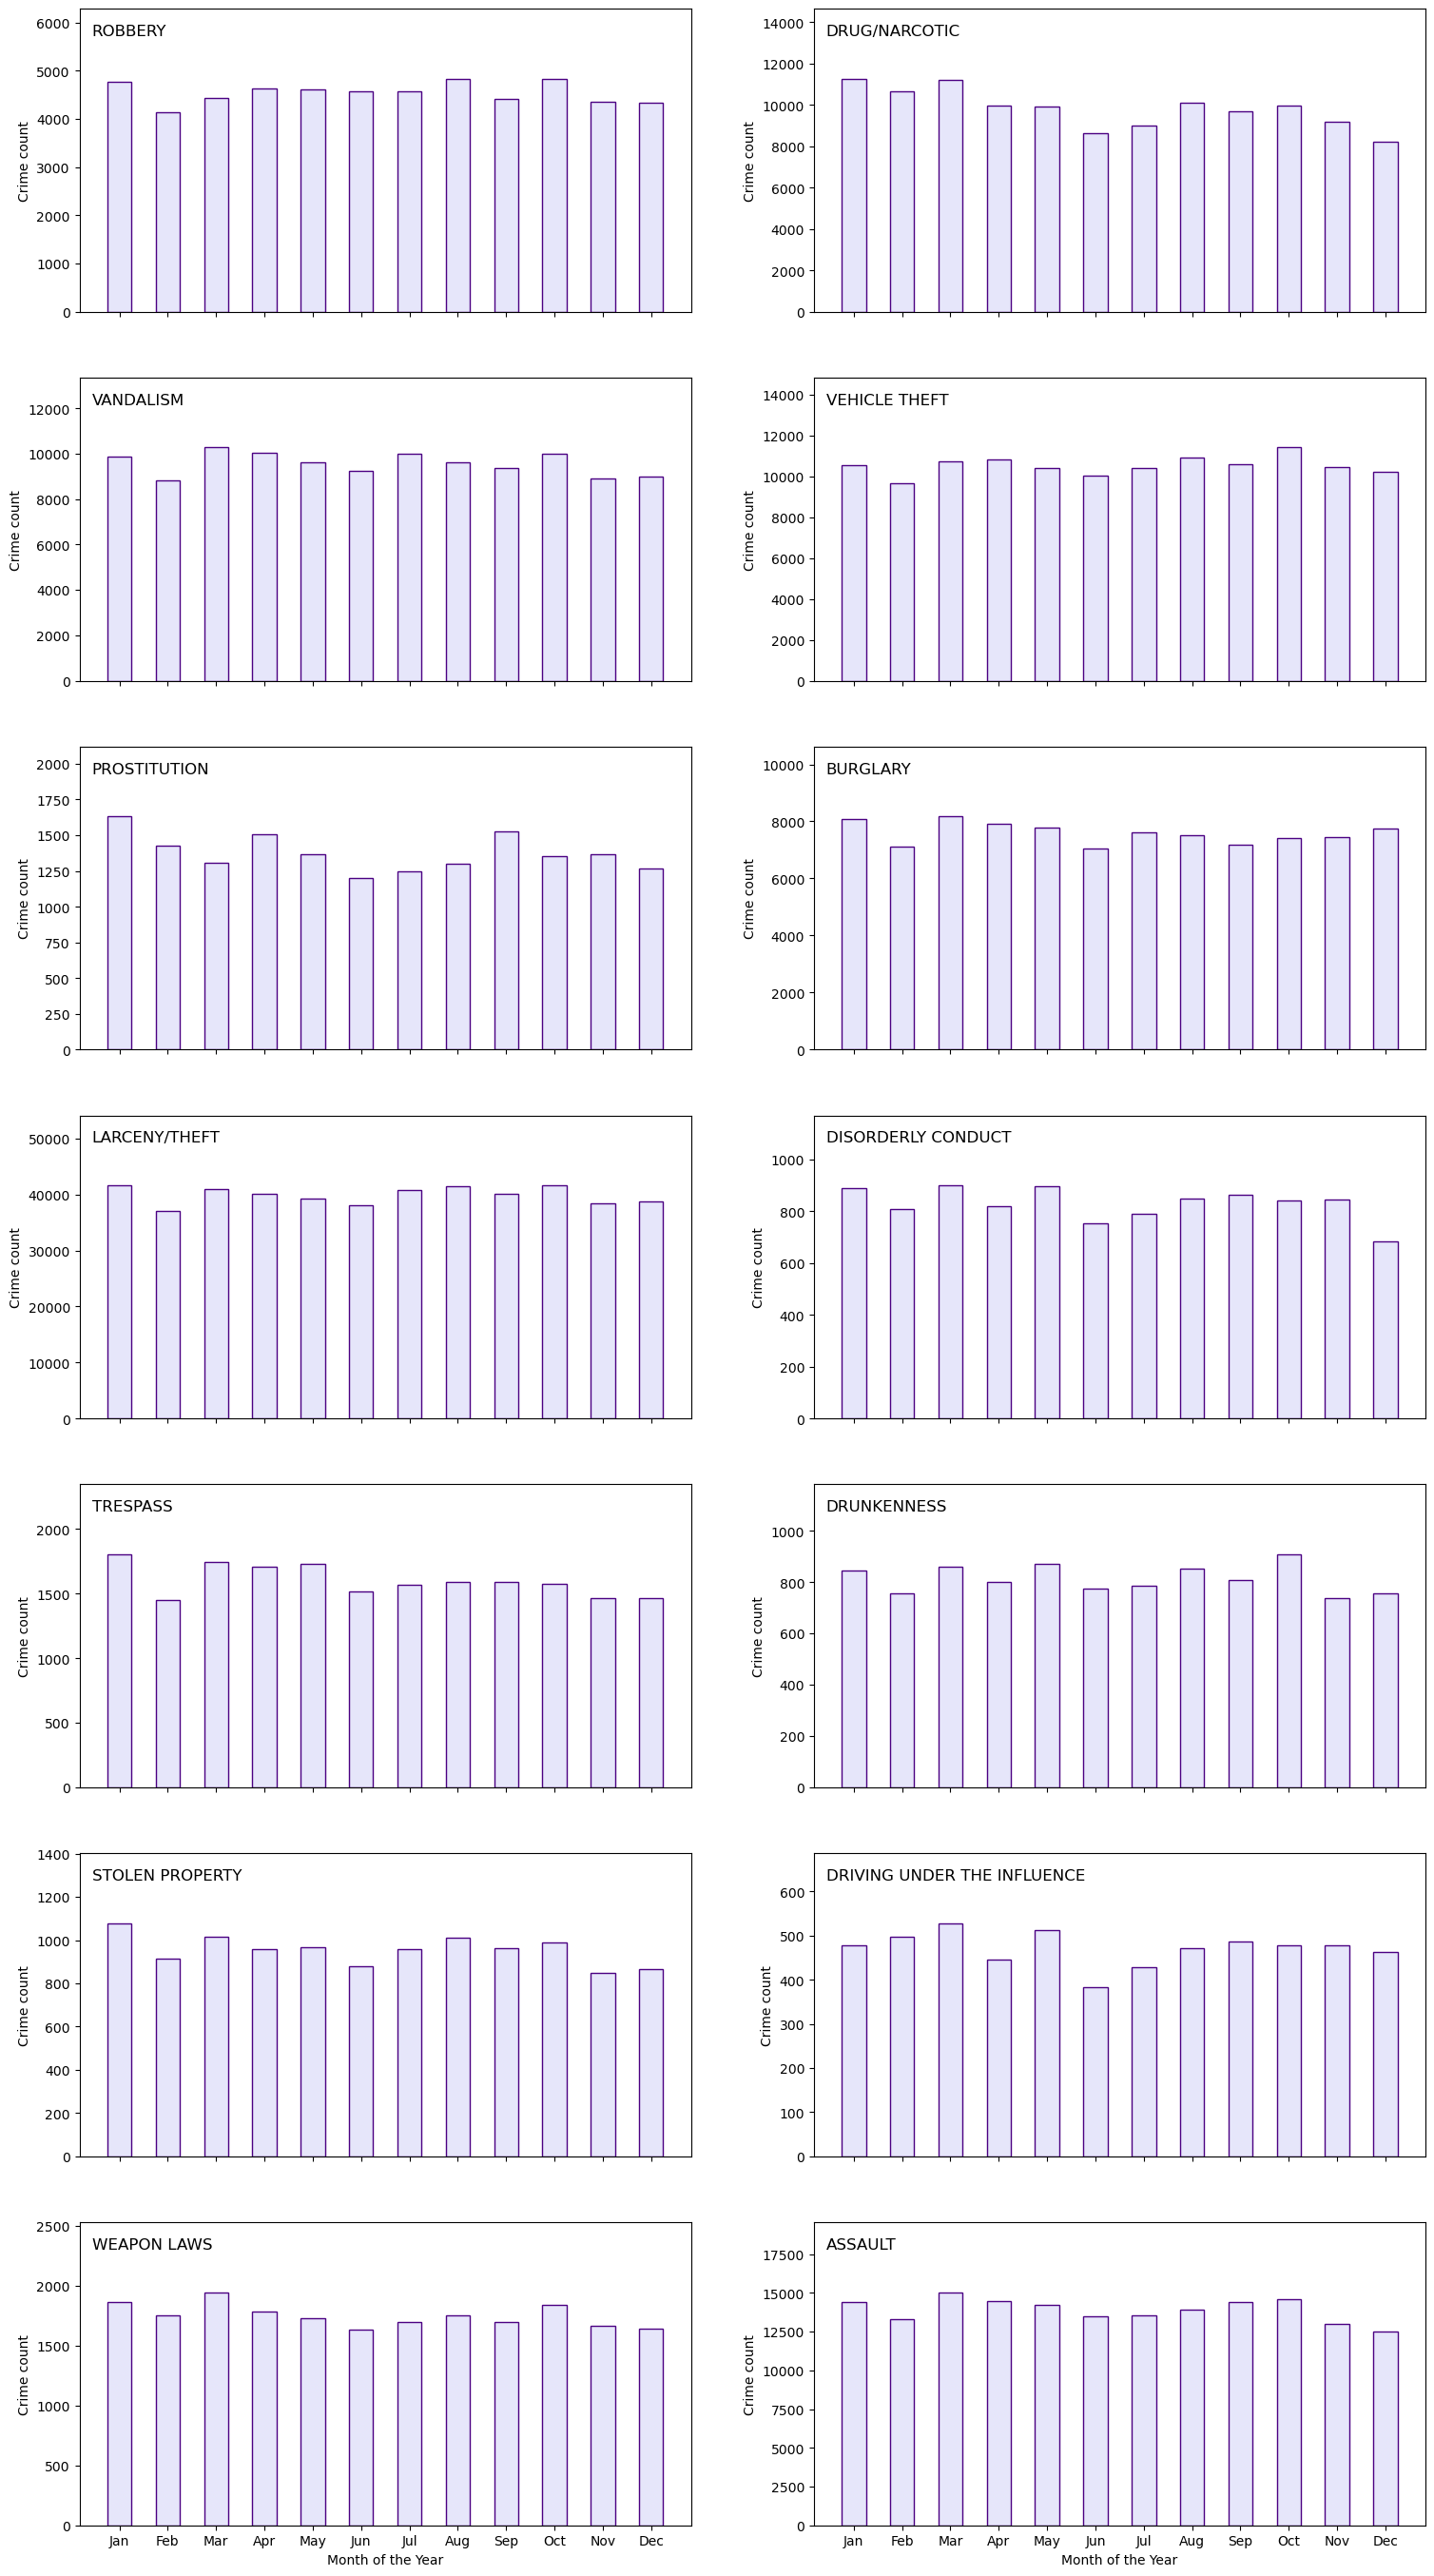

In [7]:
plt.figure(figsize = (16,28))
months_order = list(range(1,13))
months_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for i, crime in enumerate(focuscrimes, start =1):
    ax = plt.subplot(7, 2, i)
    f_temp =f[f['Category'] == crime]

    counts = f_temp['Month'].value_counts().reindex(months_order)
    
    for j, month in enumerate(months_order):
        ax.bar(j, counts.loc[month], color='lavender', edgecolor = 'indigo', linewidth = 1, width=0.5)

    x = np.arange(len(months_order))
    ax.set_xticks(x)
    ax.set_xticklabels(months_labels, rotation=0)
    ax.set_ylabel('Crime count')
    
    y_max = counts.max()
    ax.set_ylim(top=y_max * 1.3)
    
    ax.text(0.02, 0.95, f'{crime}', transform=ax.transAxes, 
            horizontalalignment='left', verticalalignment='top', 
            fontsize=12 )

    if i > 12:
        ax.set_xlabel('Month of the Year')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    else:
        ax.set_xlabel('')
        ax.set_xticklabels([])

    plt.tight_layout(pad=4.0) 
plt.show()

The plots above represent the monthly distribution of focus crimes. No consistent pattern can be observed across the different categories. None of the specific categories stand out prominently. February appears lower in all categories except for 'driving under the influence,' but this is likely due to the fewer days in February compared to other months. The variation in the number of days (31 or 30) in alternating months could account for the slight fluctuations rather than a more consistent trend.

'Prostitution' and 'driving under the influence' seem to exhibit relatively lower incidence rates during the summer months. It was expected that there would be more significant differences in the reported crime trends during different seasons of the year. However, San Francisco does not experience four distinct seasons like Denmark, which may explain this observation.

(As mentioned earlier, the zoom level on the y-axis varies for different crime categories)

**Hourly (24h) Patterns**

/var/folders/fk/jf1n3p615pj42c3yn8qkk3b80000gn/T/ipykernel_69114/1244553225.py:33: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=4.0)
/var/folders/fk/jf1n3p615pj42c3yn8qkk3b80000gn/T/ipykernel_69114/1244553225.py:33: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=4.0)
/var/folders/fk/jf1n3p615pj42c3yn8qkk3b80000gn/T/ipykernel_69114/1244553225.py:33: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=4.0)
/var/folders/fk/jf1n3p615pj42c3yn8qkk3b80000gn/T/ipykernel_69114/1244553225.py:33: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=4.0)
/var/folders/fk/jf1n3p615pj42c3yn8qkk3b80000gn/T/ipykernel_69114/1244553225.py:33: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=4.0)
/var/folders/fk/jf1n3p615pj42c3yn8qkk3b80000gn/T/ipykernel_69114/1244553225.py:33: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=4.0)
/var/folders/fk/jf1n3p

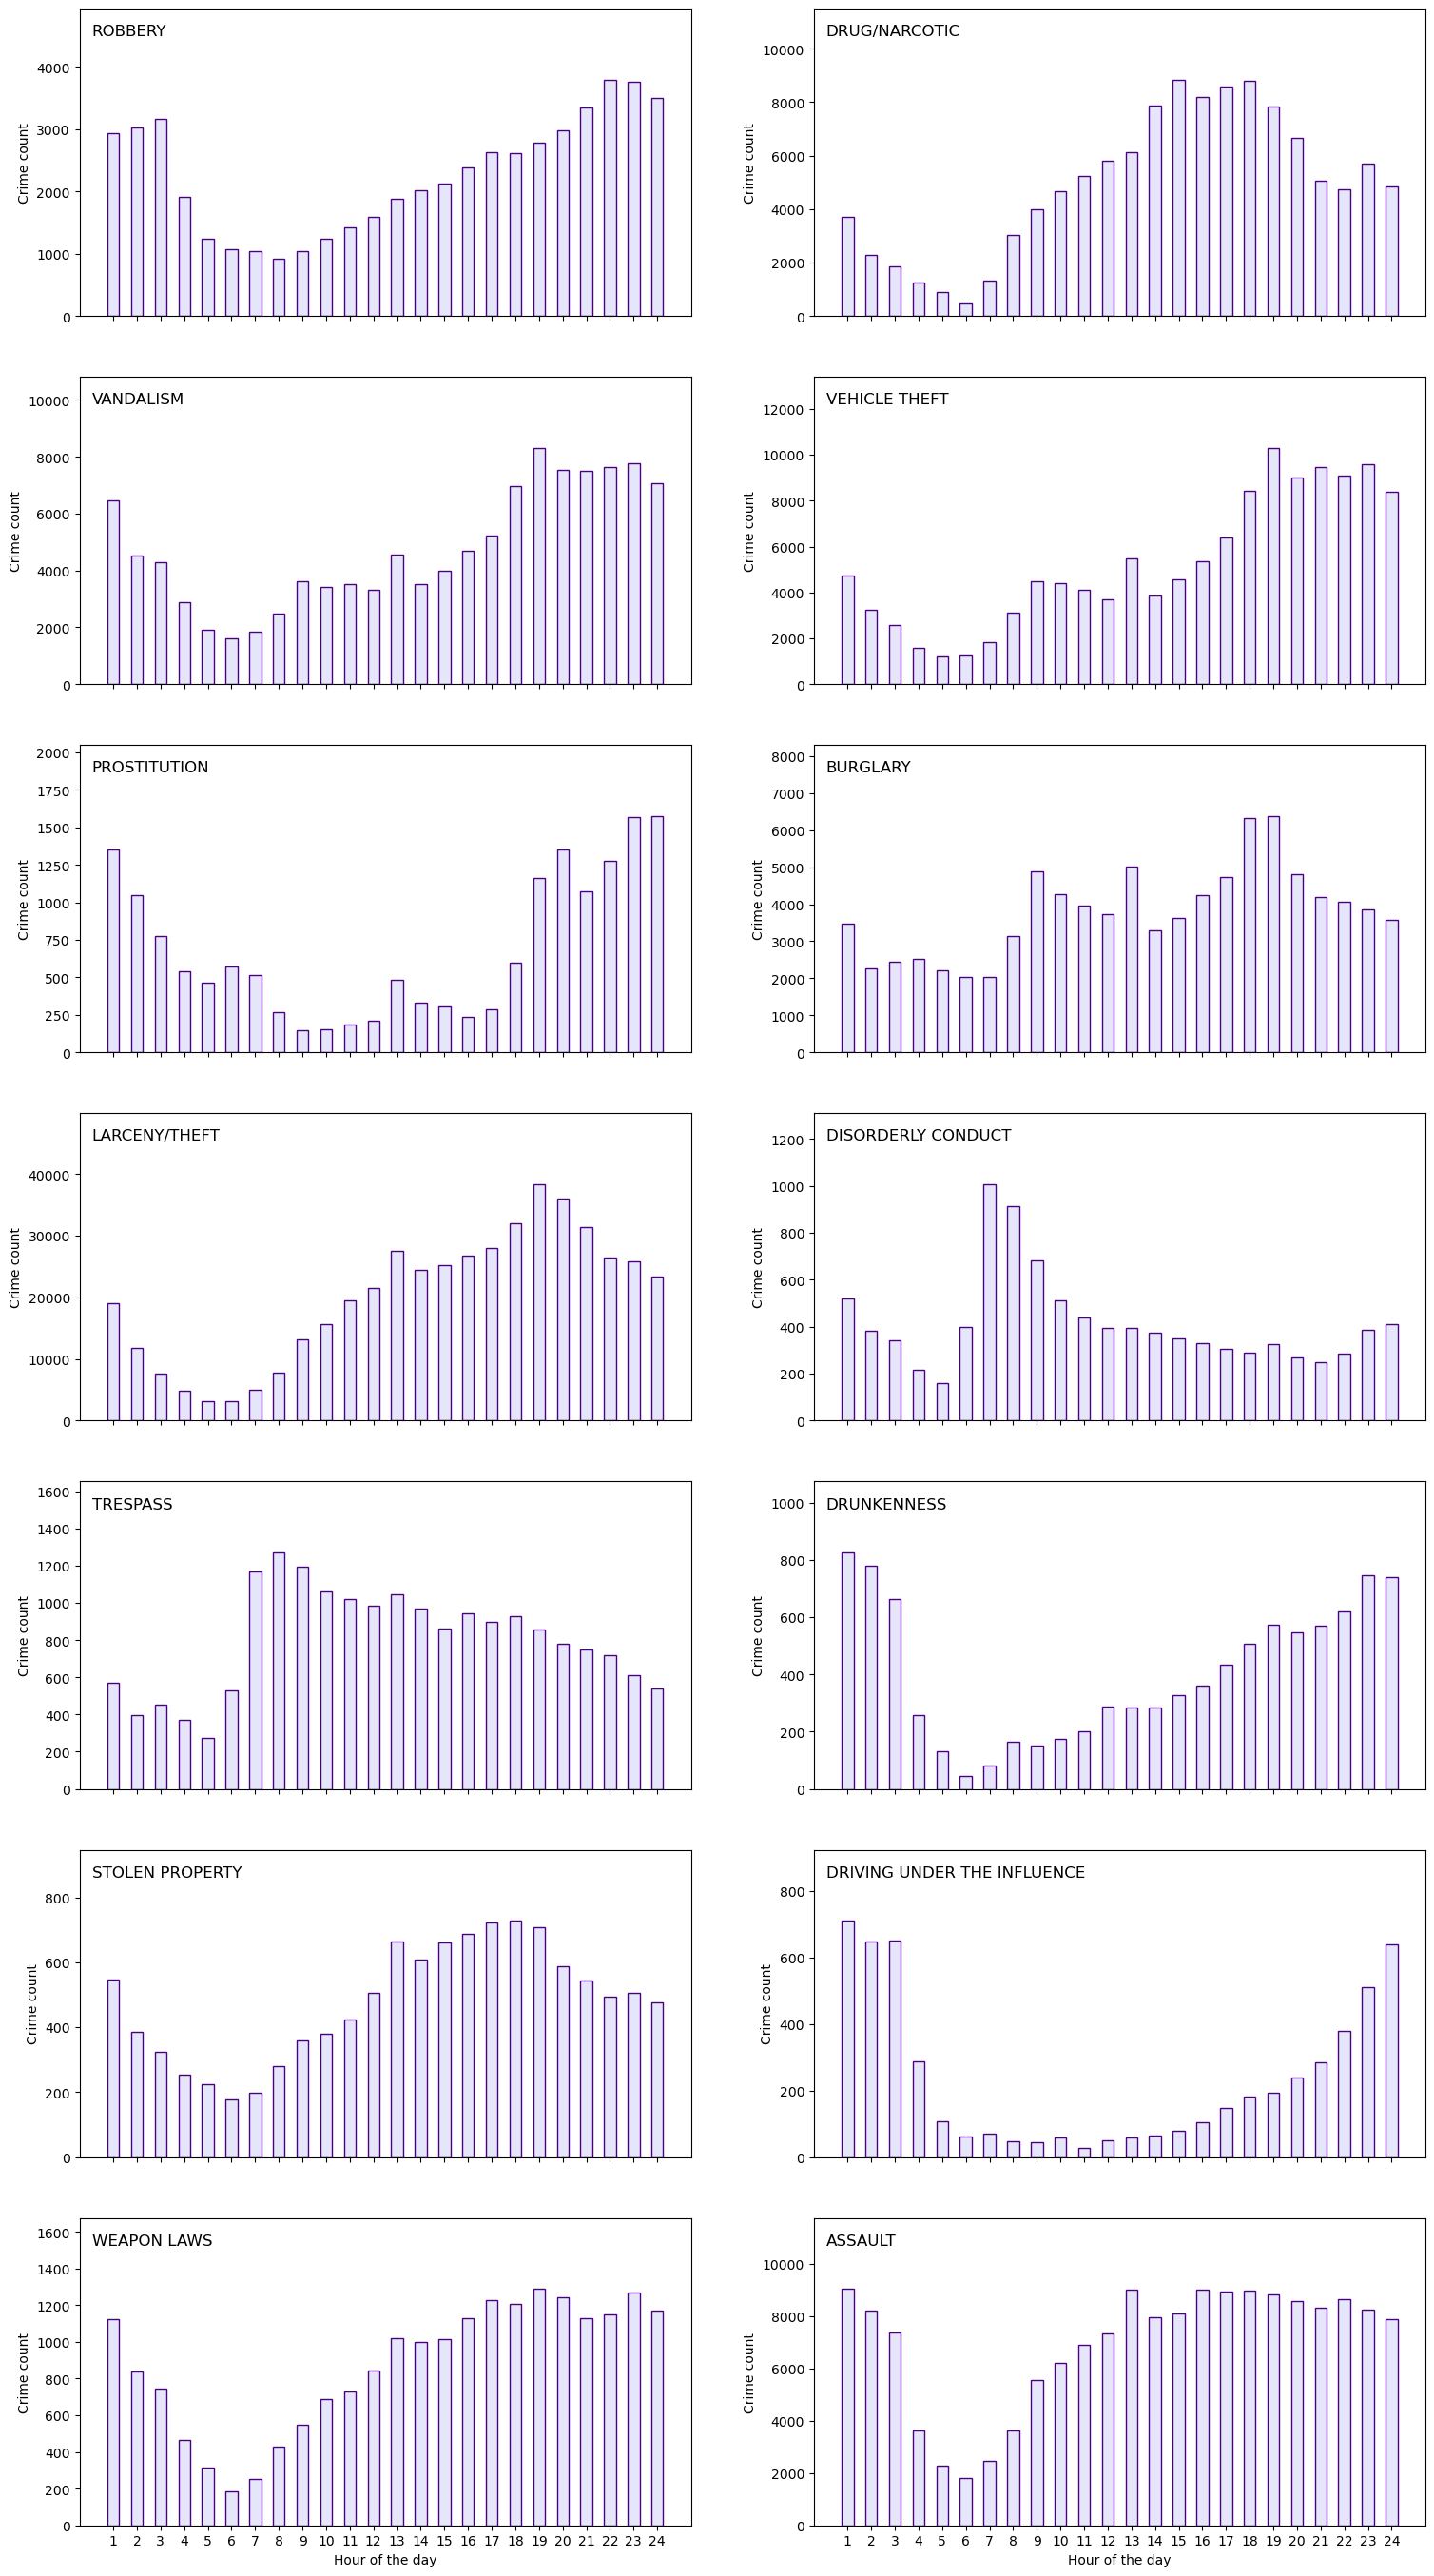

In [8]:
plt.figure(figsize = (16,28))
hours_order = list(range(0,24))
hours_labels = list(range(1,25))

for i, crime in enumerate(focuscrimes, start =1):
    ax = plt.subplot(7, 2, i)
    f_temp =f[f['Category'] == crime]

    counts = f_temp['Hour'].value_counts().reindex(hours_order)
    
    for j, hour in enumerate(hours_order):
        ax.bar(j, counts.loc[hour], color='lavender', edgecolor = 'indigo', linewidth = 1, width=0.5)

    x = np.arange(len(hours_order))
    ax.set_xticks(x)
    ax.set_xticklabels(hours_labels, rotation=0)
    ax.set_ylabel('Crime count')
    
    y_max = counts.max()
    ax.set_ylim(top=y_max * 1.3)
    
    ax.text(0.02, 0.95, f'{crime}', transform=ax.transAxes, 
            horizontalalignment='left', verticalalignment='top', 
            fontsize=12 )

    if i > 12:
        ax.set_xlabel('Hour of the day')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    else:
        ax.set_xlabel('')
        ax.set_xticklabels([])

    plt.tight_layout(pad=4.0) 
plt.show()

The plots above represent the hourly distribution of focus crimes within a day. All categories show a peak in the early hours, which aligns with the understanding that crimes often occur during the night. As daylight emerges, the number of reported incidents decreases for all categories before increasing again later in the day. However, several noteworthy observations merit attention: 
- *Burglary:* Exhibits a relatively high number of incidents during daytime hours, with less of a drop compared to other categories. This aligns with expectations, as most burglaries occur when homeowners are away at work or school. It's notable that many cases are reported only upon the homeowners' return, especially if there is no alarm. This may explain the sustained high number of reported incidents during late hours, particularly peaking around the 18th and 19th hours.
- *Trespas:* Similar to burglary, trespassing shows relatively more reported incidents during daytime compared to other categories.
- *Disorderly Conduct:* Peaks in the 7th, 8th, and 9th hours before decreasing.
- *Assult:* Although it follows the general trend of decreasing incidents in the morning and increasing later in the day, the drop is brief, with a rise beginning as early as the 8th hour.

(As mentioned earlier, the zoom level on the y-axis varies for different crime categories)

**Hourly Patters over a Week**

In [9]:
day_to_num = {'Monday':0, 'Tuesday':1, 'Wednesday':2, 'Thursday':3, 'Friday': 4, 'Saturday':5, 'Sunday':6}
f['WeekHour'] = f['DayOfWeek'].map(day_to_num) * 24 + f['Hour']

/var/folders/fk/jf1n3p615pj42c3yn8qkk3b80000gn/T/ipykernel_69114/391088015.py:36: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=4.0)


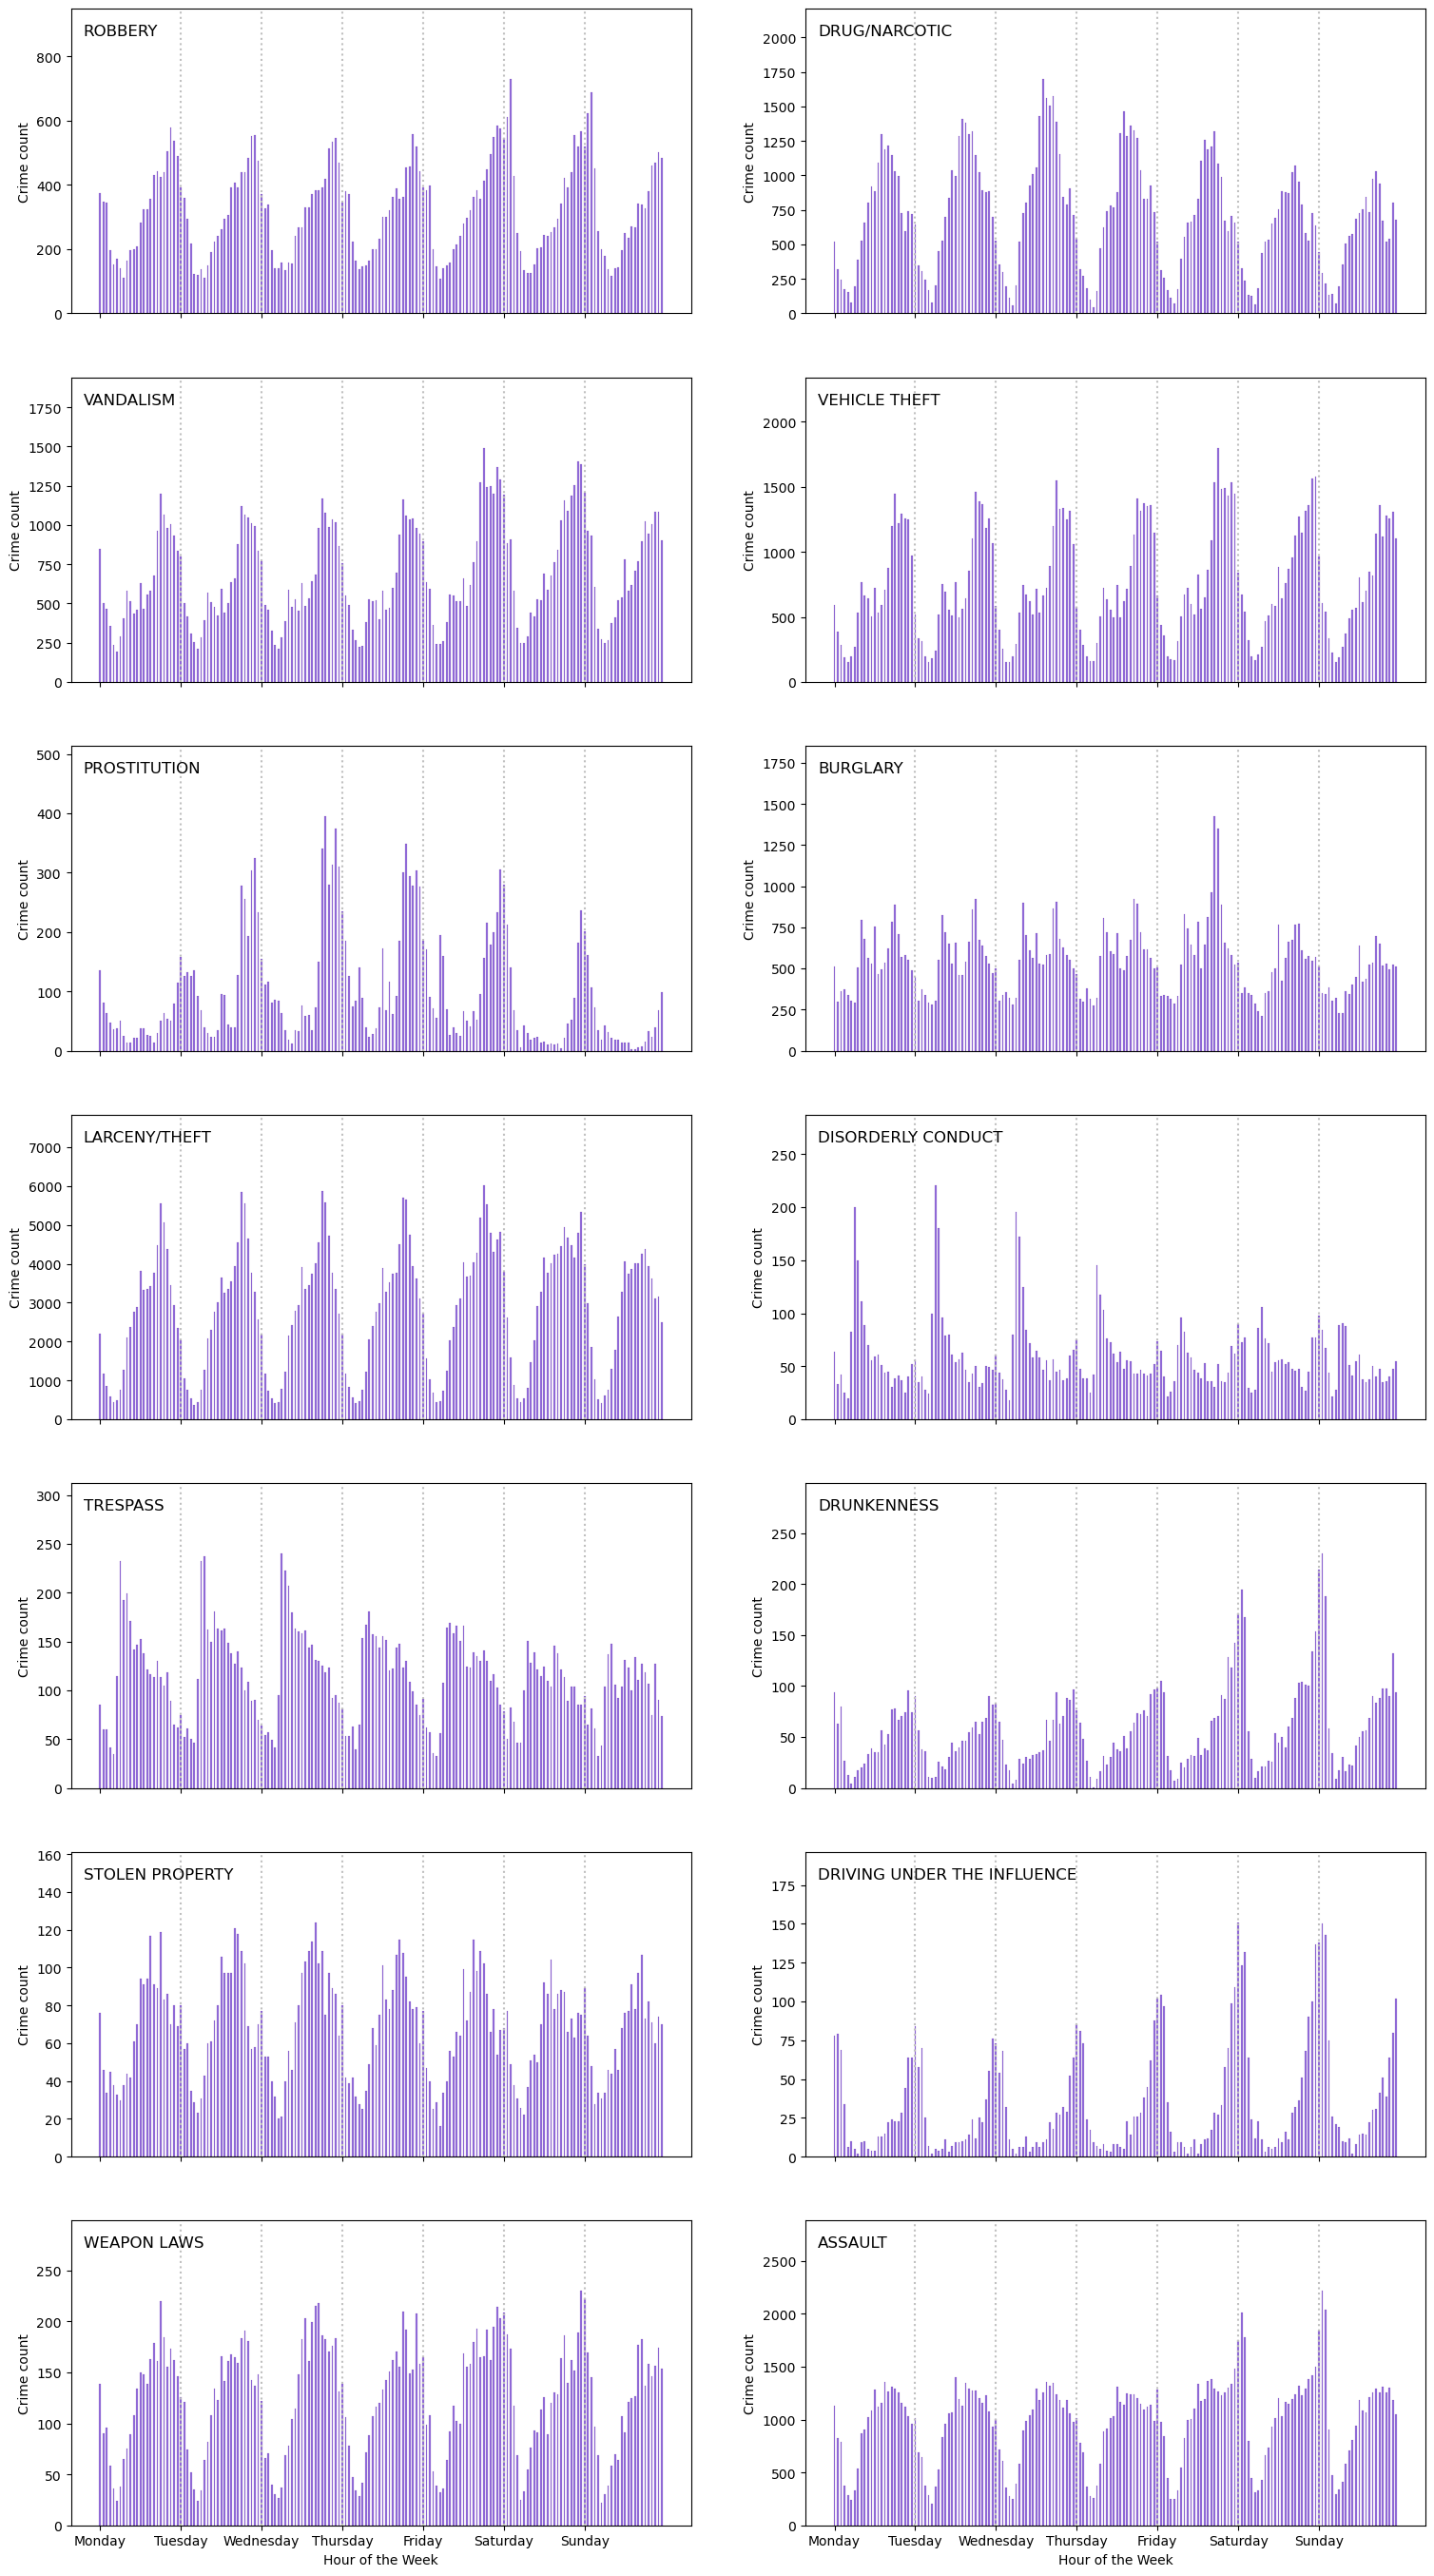

In [10]:
plt.figure(figsize = (16,28))
week_hours_order = list(range(0,168))
weekdays_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for i, crime in enumerate(focuscrimes, start =1):
    ax = plt.subplot(7, 2, i)
    f_temp =f[f['Category'] == crime]
    
    counts = f_temp['WeekHour'].value_counts().reindex(week_hours_order)
    
    for j, hour in enumerate(week_hours_order):
        ax.bar(j, counts[hour], color='mediumpurple', edgecolor = 'indigo', linewidth = 0.08, width=0.5)

    x = list(range(0,168,24))
    ax.set_xticks(x)
    ax.set_xticklabels(weekdays_order, rotation=0)
    ax.set_ylabel('Crime count')
    
    y_max = counts.max()
    ax.set_ylim(top=y_max * 1.3)
    
    ax.text(0.02, 0.95, f'{crime}', transform=ax.transAxes, 
            horizontalalignment='left', verticalalignment='top', 
            fontsize=12 )
    
    for day in range(1, 7):
        plt.axvline(day * 24, color='silver', linestyle=':')
    
    if i > 12:
        ax.set_xlabel('Hour of the Week')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    else:
        ax.set_xlabel('')
        ax.set_xticklabels([])

    plt.tight_layout(pad=4.0)
plt.savefig('168HourlyPatterns.png', dpi=300)
plt.show()

The plots above represent the hourly distribution of focus crimes within a week. The plots exhibit consistency in the hourly trends, albeit with relatively higher peaks on certain days, which aligns with the analysis of the weekday plots 
- *Burglary:* On Fridays, there is a peak during the 18th to 20th hours, which may have contributed to the observed peak in the 24-hour trend plots. Plotting 168 hours helped clarify the misunderstanding from the 24-hour trend that burglary is significantly higher during these hours in general for all days, which isn't the case. Although it's elevated, it isn't consistently much higher during the other days specifically between the 18th and 20th hours.
- *Trespas and Disorderly Conduct:* Show significantly higher peaks in the early hours only on Monday through Wednesday.

(As mentioned earlier, the zoom level on the y-axis varies for different crime categories)

2. Next choose a crime type that you like and create a calendar plot (Week 2, Part 4). Don't forget to comment on patterns you observe.

In [11]:
p = f[f['Category'] == 'PROSTITUTION']
p = p.copy()

Converting the Date column to datetime:

In [12]:
p['Date'] = pd.to_datetime(p['Date'])

Grouping the incidents by date and freuency to get the number of incidents each day to plot in the calendarplot:

In [13]:
p_counts = p.groupby(pd.Grouper(key='Date', freq ='D')).size()

/var/folders/fk/jf1n3p615pj42c3yn8qkk3b80000gn/T/ipykernel_69114/523338368.py:3: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=4.0)
/var/folders/fk/jf1n3p615pj42c3yn8qkk3b80000gn/T/ipykernel_69114/523338368.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=4.0)


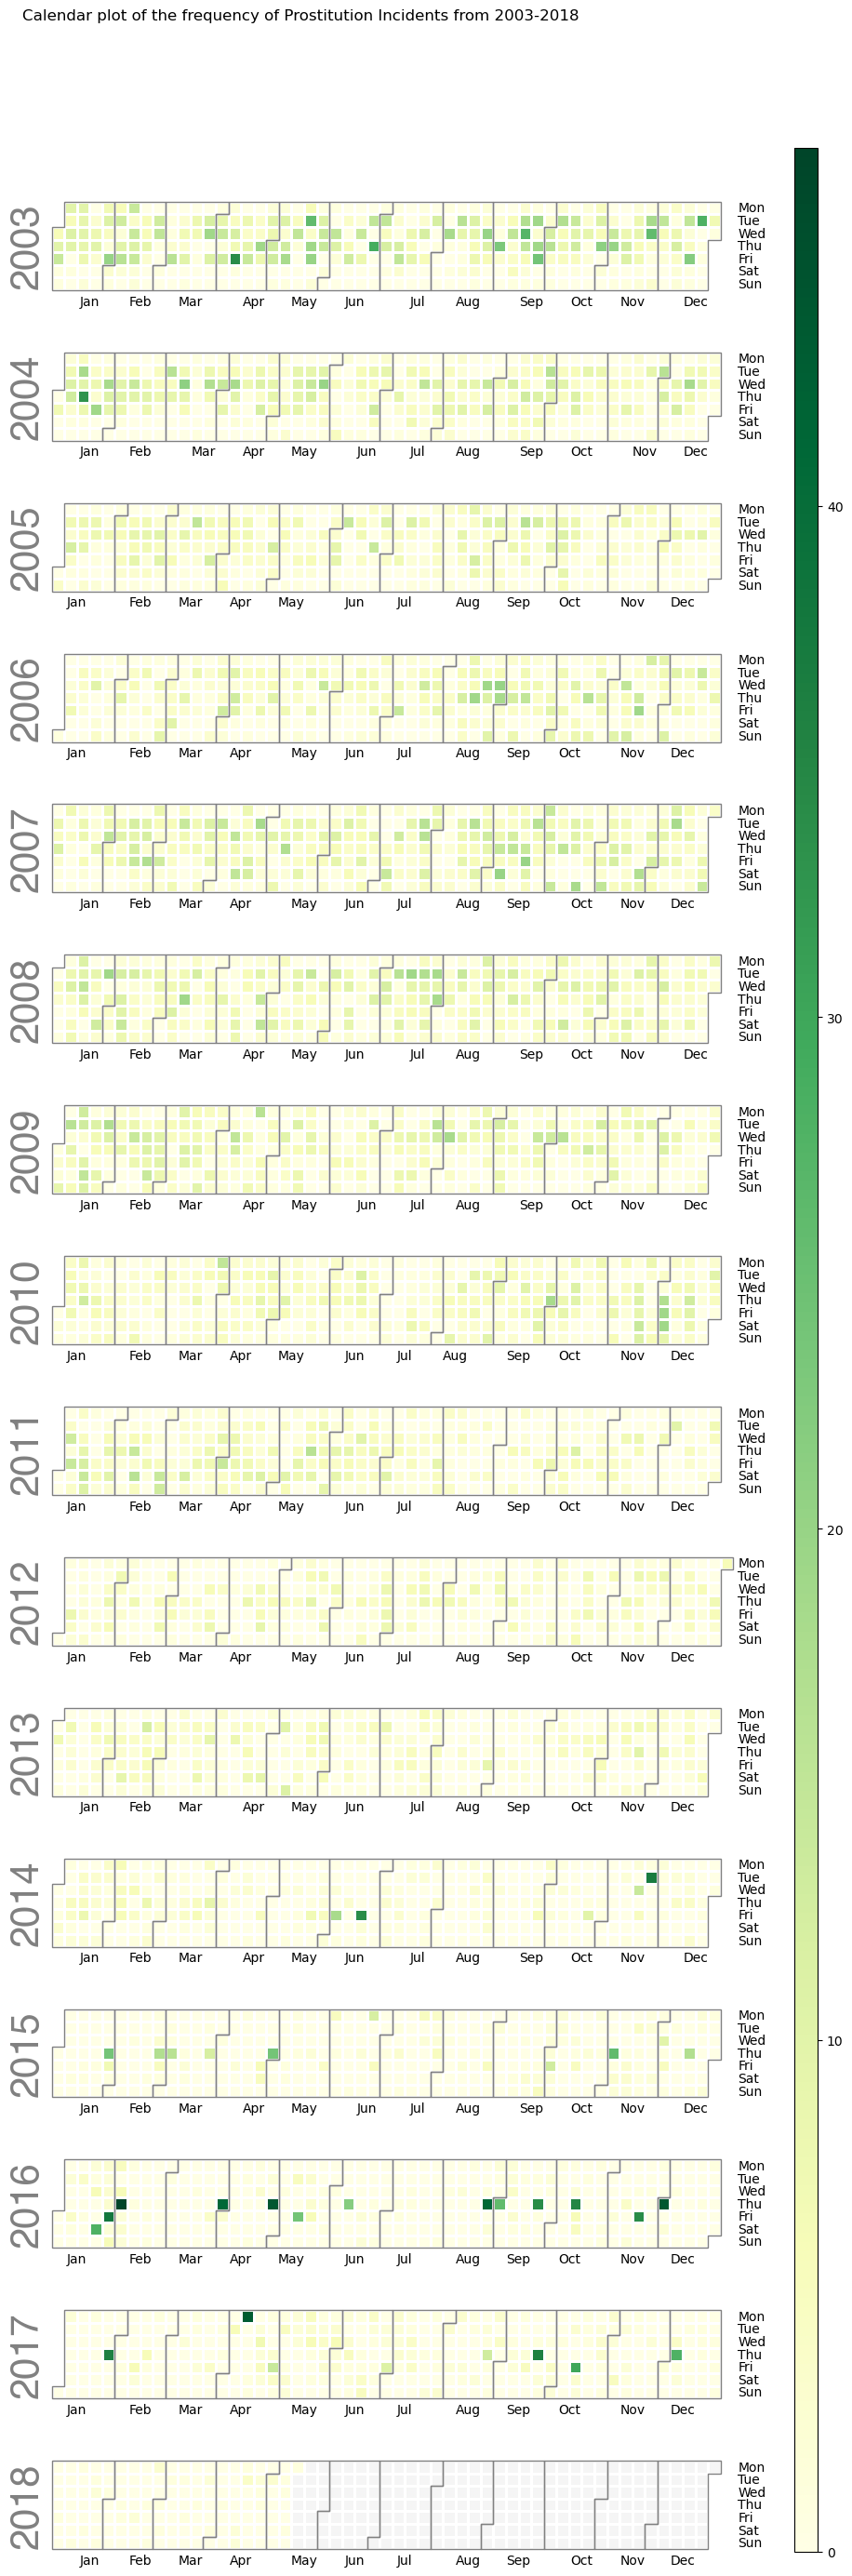

In [14]:
title = 'Calendar plot of the frequency of Prostitution Incidents from 2003-2018'
calplot.calplot(p_counts, suptitle = title, cmap = 'YlGn', tight_layout = True)
plt.tight_layout(pad=4.0)
plt.savefig('CalPlot YlGn.png', dpi = 300)

The chosen crime category is 'Prostitution' as it stood out in the above observations. The calendar plot above represents the frequency of reported incidents during each day from January 2013 to mid-May 2018. It is quite interesting to observe the differences in reported frequency across different years. The greener the plot, the more frequent the incidents were. It is evident that 2003, 2007, and 2008 had the most reported incidents, while from 2012 to 2014, there were almost none. However, in 2014, 2016, and 2017, there are only a few green days, but these days are very green. This suggests that if prostitution was reported on a certain day, there were either a lot of cases or none at all. Perhaps the perpetrators became better at hiding the prostitution rings, making them more difficult to detect. However, once detected, it usually involved a significant operation. The drop in daily reported incidents of prostitution after 2011 could be due to a new law or restriction in San Francisco. 

3. Choose a different crime type and create a polar plot of its 24hour cycle

In [15]:
dui = f[f['Category']== 'DRIVING UNDER THE INFLUENCE']
dui = dui.copy()

Total number incidents of driving under the influence each hour:

In [16]:
dui_counts = dui.groupby('Hour').size()

Creating 24-hour pattern polar bar chart:

In [17]:
theta = np.linspace(0, 2*np.pi, 24, endpoint = False)

It makes logical sense to call the hights of the barcounts as radii:

In [18]:
radii = dui_counts.values

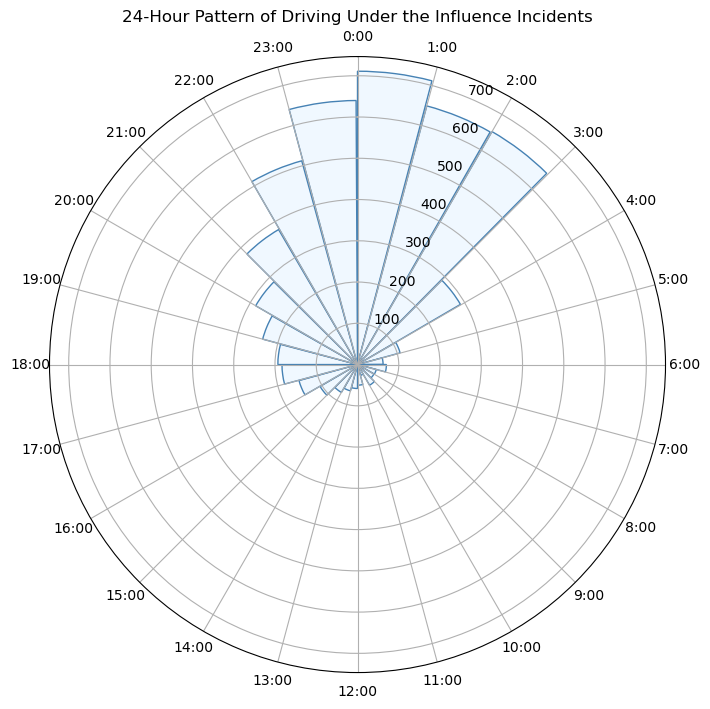

In [19]:
fig, ax = plt.subplots(figsize=(8,8), subplot_kw={'projection':'polar'})

bars = ax.bar(theta, radii, width=2*np.pi/24.5, color='aliceblue', edgecolor = 'steelblue', align='edge')

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

ax.set_xticks(theta)
ax.set_xticklabels([f'{i}:00' for i in range(24)])

plt.title('24-Hour Pattern of Driving Under the Influence Incidents')
plt.savefig('PolarPlot.png', dpi = 300)
plt.show()

The polar plot above represents the 24-hour pattern of 'Driving under the influence' crime incidents. It is evident that the reported incidents are lowest from 4:00 to 16:00, with approximately 100 or fewer cases, then gradually start increasing to approximately 300 cases by 20:00, and up to 650-700 incidents until 3:00 the following morning with a peak from midnight to 1 am. 

Using a polar bar chart allows for a clear visualization of the cyclical nature of the crime incidents throughout the day.  However, it is not ideal for effectively comparinging the frequency of incidents between different time periods of the day, as the circular layout can make it difficult to accurately assess differences in magnitude. 

4. Write a short reflection (max 400 words, shorter is OK) on how you've used LLMs to solve these assignments (or if you didn't use LLMs, explain why).

I have used LLMs models to lean to improve my plots for better visualisation. To learn different features of the plotting functions to experiment.  

## A1 Part 2: Dataviz questions 

Have a look at the Data Viz intro lecture (Week 2), then answer the following questions in your own words. 

1. What is the difference between data and metadata? How does that relate to the GPS tracks-example?
> Data refers to raw facts and figures, such as geographical coordinates in GPS tracking. Metadata is data about data, detailing the context and characteristics of the primary data, like the device used for GPS tracking and the time of recording. In GPS tracks, data gives the essential information (locations and timestamps), while metadata provides context (device type, activity purpose), enhancing data understanding and management. 

2. Sune says that the human eye is a great tool for data analysis. Do you agree? Explain why/why not.
 
-  Mention something that the human eye is very good at.

> The human eye is indeed a powerful tool for data analysis, especially for identifying patterns, trends, and outliers in visual data representations like graphs and charts. It excels at spotting anomalies and irregularities that automated analysis tools might overlook, thanks to our innate ability to process visual information and recognize patterns.
- Can you think of something that is difficult for the human eye to process visually. Explain why your example is difficult.

> The human eye has limitations, particularly when dealing with large datasets or complex, high-dimensional data. It struggles with accurately quantifying or comparing subtle differences in magnitude or identifying patterns in data beyond three dimensions. 

> For example, while the eye can easily discern the general trend in a scatter plot, it may find it difficult to accurately determine the correlation coefficient between variables just by looking. This difficulty arises because the human visual system is not equipped to process numerical precision or multi-dimensional relationships in the same way a statistical analysis can. 

> Another example is the polar bar chart that was analysed in part 1 of this assignment. As mantioned, the circular layout can make it difficult for the human eye to accurately assess differences in magnitude.
  
3. Simpson's paradox is hard to explain. Come up with your own example - or find one on line.

>**Younger Patients:**
>* Medication A effective for 90 out of 100 patients (90% effectiveness).
>* Medication B effective for 30 out of 50 patients (60% effectiveness).

>**Older Patients:**
>* Medication A effective for 20 out of 100 patients (20% effectiveness).
>* Medication B effective for 40 out of 50 patients (80% effectiveness).

>**Analysis by Age Group:**
>A is more effective for younger patients, while B is more effective for older patients.

>**Combined Results:**
>* A was effective for 110 out of 200 patients (55% effectiveness).
>* B was effective for 70 out of 100 patients (70% effectiveness).

> The combined results misleadingly suggest that B is overall more effective than  A, even though A was more effective in the younger group and B was more effective in the older group.

4. In your own words, explain the differnece between exploratory and explanatory data analysis.

> **Exploratory Data Analysis (EDA)** is the initial phase of data analysis, where the goal is to discover patterns, spot anomalies, test hypotheses, and check assumptions through summary statistics and graphical representations. It's about understanding the data's structure and extracting insights without prior hypotheses.

> **Explanatory Data Analysis**, on the other hand, focuses on explaining findings, validating models, and communicating results clearly to a target audience. It aims to convey the main characteristics and insights derived from the data, often after the exploratory phase has identified the key trends and relationships.

## A1 Part 3: Visualizing geodata using Plotly

In this sub-assignment I want you to create a choropleth map of San Francisco, showing where it's safest to leave your car on Sundays, following the instructions from Week 3.

When you're done, reflect on the following questions.

1. Based on your map and analysis, where should you park the car for it to be safest on a Sunday? And where's the worst place?
> Based on the map, we can observe different districts have varying shades of red ranging from light red to deep red, indicating the increasing vehicle theft cases which suggests the relative safety to stop a car in those areas. From the map, we can see TENDERLOIN with the lightest shape of red in the map is the most safest place for parking while a place called INGLESIDE is depicted in deep red color is the most dangerous district to park.

2. Using visualizatios can help us uncover powerful data-patterns. However, when designing visualizations, we need to be aware of several illusions that can lead viewers to misinterpret the data we are showing (i.e. perceptual errors):
- Try to change the range of data-values in the plot above. Is there a way to make the difference between district less evident?
> Yes, by altering the range on the right zoom level from 1 to 1600 to a broader range of 1 to 10000, diminishes the ability to distinguish between districts’ safety levels, which shows all districts with the similar risk to park due to the adjusted scale covers a wide range that minimizes the visual differences in theft incidents for automobiles across districts.
- Why do you think perceptual errors are a problem? Try to think of a few examples. 
> Perceptual errors in statics refer to misinterpretations or misunderstandings of statiscal data due to the way information is presented or due to cognitive biases, which significantly impact the conclusions drawn from data leading to incorrect decisions or judgments.
The reason why they are a problem can be accounted for several reasons. Firstly, graphs that are not scaled properly can contribute to a distorted view of data. For example, given the above example, by simply enlarging the size of right zoom level can make people feel there is no difference in parking within different districts as they all display the same color when we have a big scale. On the contrary, by simply shrinking the scale of the right zoom level may lead to mindless panic for observing there are so many red districts in the map. Besides, they can contribute to confirmation errors when an observed figure supporting their preconceived notions or hypothesis, while dismissing evidence that contradicts them. For example, a person who believes a district is very dangerous may prefer believe it has the highest number of all sorts of crimes even though the statistics may show the district only has a high number in some crimes. Additionally, another concern about perceptual errors is base rate neglect by dismissing or undervaluing the base rate of an event. For instance, individuals viewing the map might be deterred from parking their car in INGLESIDE for its representation in the deepest red color. However, the truth is the overall prevalence of a vehicle theft remains originally relatively low. Besides, this map has considered all the thefts occurred from 2003 to 2018, contributing to the aggregate crimes in different districts, which is not the daily average numbers of automobile theft crimes across districts.


# Assignment 1 Part 4

## 1. Prostitution on Thursdays
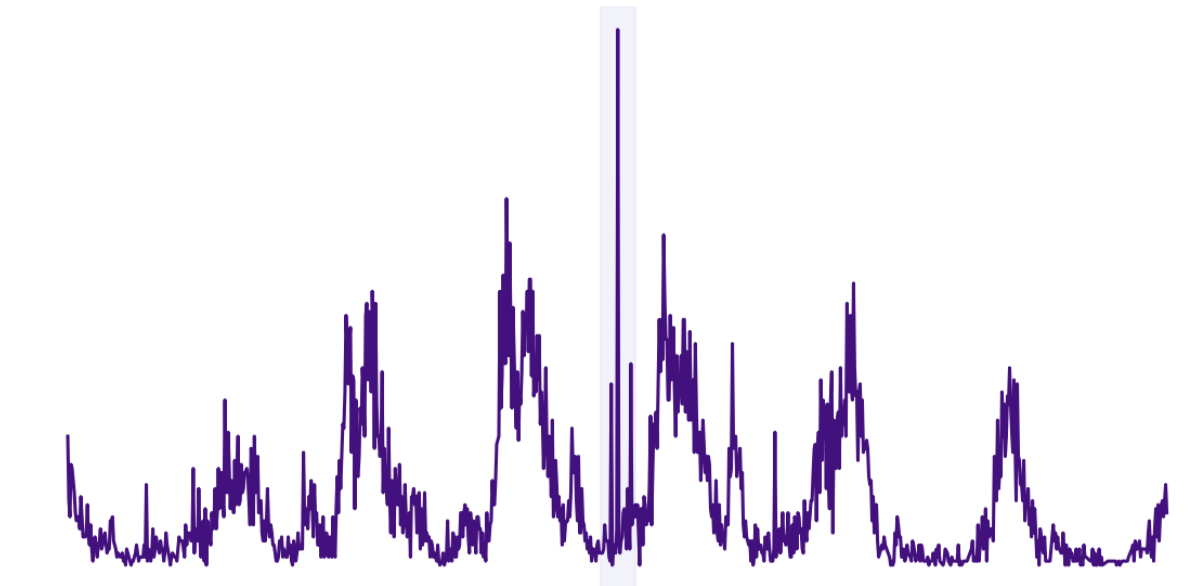

1. In this data error, we see that a lot of prostitution arrests apparently happens on Thursdays. At least, that is when the police officers who write the reports have set the crime to have happened. This will bias the data when binned, in a number of ways. Most importantly, the data will now be skewed towards Thursday being most prone to cases of prosititution. Any aggregated statistics will show this as well, such as the average amount of arrests for prostitution, since Thursdays are overrepresented in the data. There might be one week that had an abnormal amount of prostitution arrests for some reason, causing the rest of the data to be severely skewed towards Thursdays. 

2. It gives a skewed idea that Thursdays are when most prostitution cases are happening and might cause the police to increase their patrols looking for prostitution on Thursdays, which could have an recursive effect of causing more arrests for prostitution on Thursdays, looping around to our models showing Thursdays as the most "active" day for prostitution. It can cause incorrect assumptions in the police and from researchers like us, who, while modelling the data, might not notice the error, and assume that Thursdays are when the police should be patrolling. 

## Rounded up or down times of crimes
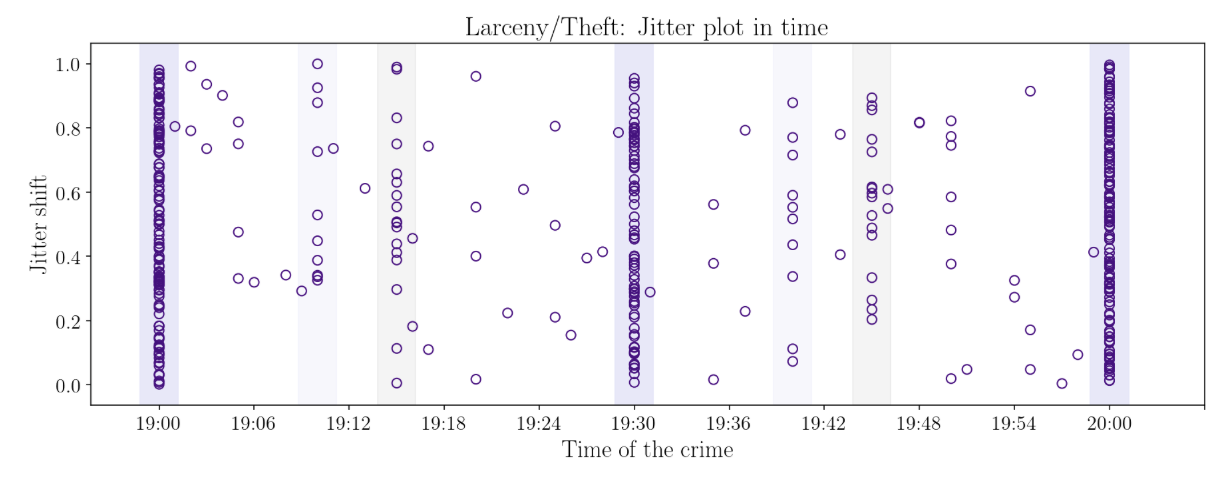

1. Here we can see a jitter plot of the different times a crime is reported. The plot here is restricted to the hour between 19:00 and 20:00. Often times, the crimes are clearly rounded to the nearest whole hour or half hour. This might happen because the officer making the report didn't know exactly when the crime happened, and makes an estimate. But it definitely skews the data toward either the start, middle and end of hours. It underrepresents the real times that a crime can happen. So that when the data is binned, the peaks will be around the rounded hours. This means that times with "high" crime are artificially created, since the times are mostly an estimate. 

2. For modelling and data visualization, this can give a incorrect picture of the real world happenings in San Francisco. Most crimes don't happen exactly at 19:00 or 20:00, they are much more likely to happen at a time like 19:03 or 19:27 or 19:46. This is misleading for what the actual crime patterns in the city might be. This means that any crime prevention policies made on the basis of models using this data, will most likely overemphasize the times at the beginning or end of the hour. 

## Sex offence hot spot at Hall of Justice
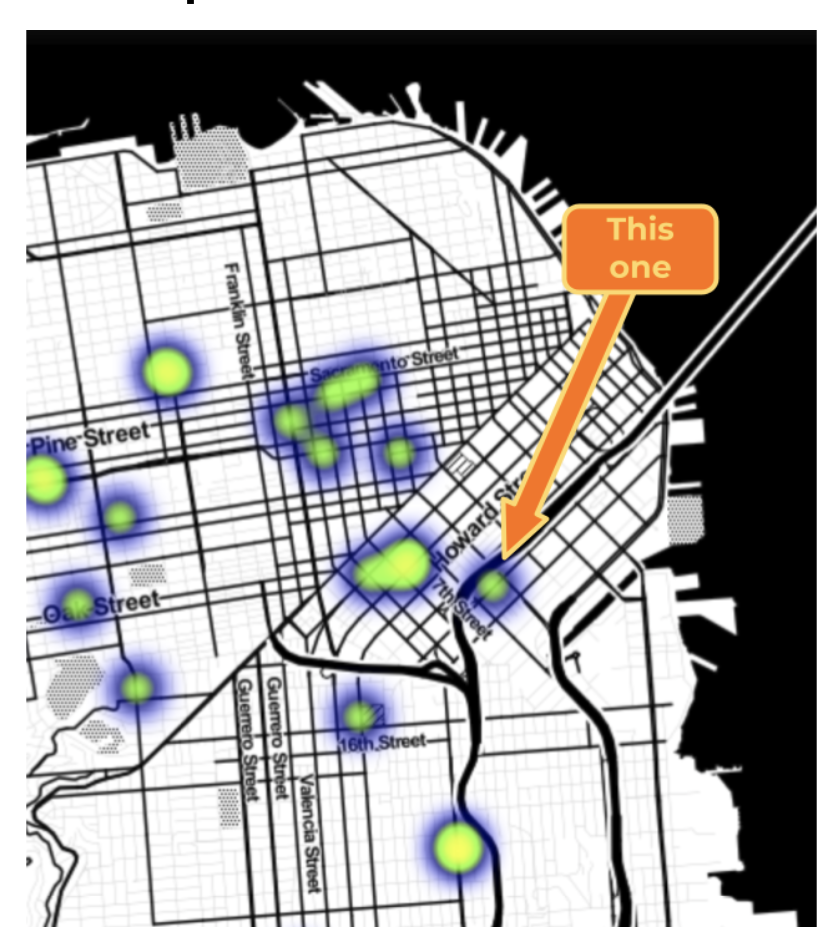

1. The data here shows a hot spot of crime around the Hall of Justice in San Francisco. This is most likely because it is a landmark most police officers in San Francisco know. So when an officer doesn't quite remember where an arrest happened, but know it was near the Hall of Justice, perhaps on the same street, they put that as the address. But this is misleading, since it shows the Hall of Justice as a sex offence hot spot, which seems unlikely to be the truth. This means any aggregated crime statistics for that area will show a large amount of crimes around the Hall of Justice.

2. Since the data is now skewed towards the Hall of Justice having many sex offences, it skews the area around it as well. Our models will show this area as having a lot of arrests, which might lead to the police or local government make decisions such as increased patrols or allocation of more resources to the police in that area, which would be misguided. 

## Human Noise in Dataset

The sheer amount of larceny theft that is reported by the police in San Francisco could be the result of human error. Some of the theft might instead be robbery, burglary or any of the other theft related crimes. If we look at the boxplots for each of the categories it becomes very clear:

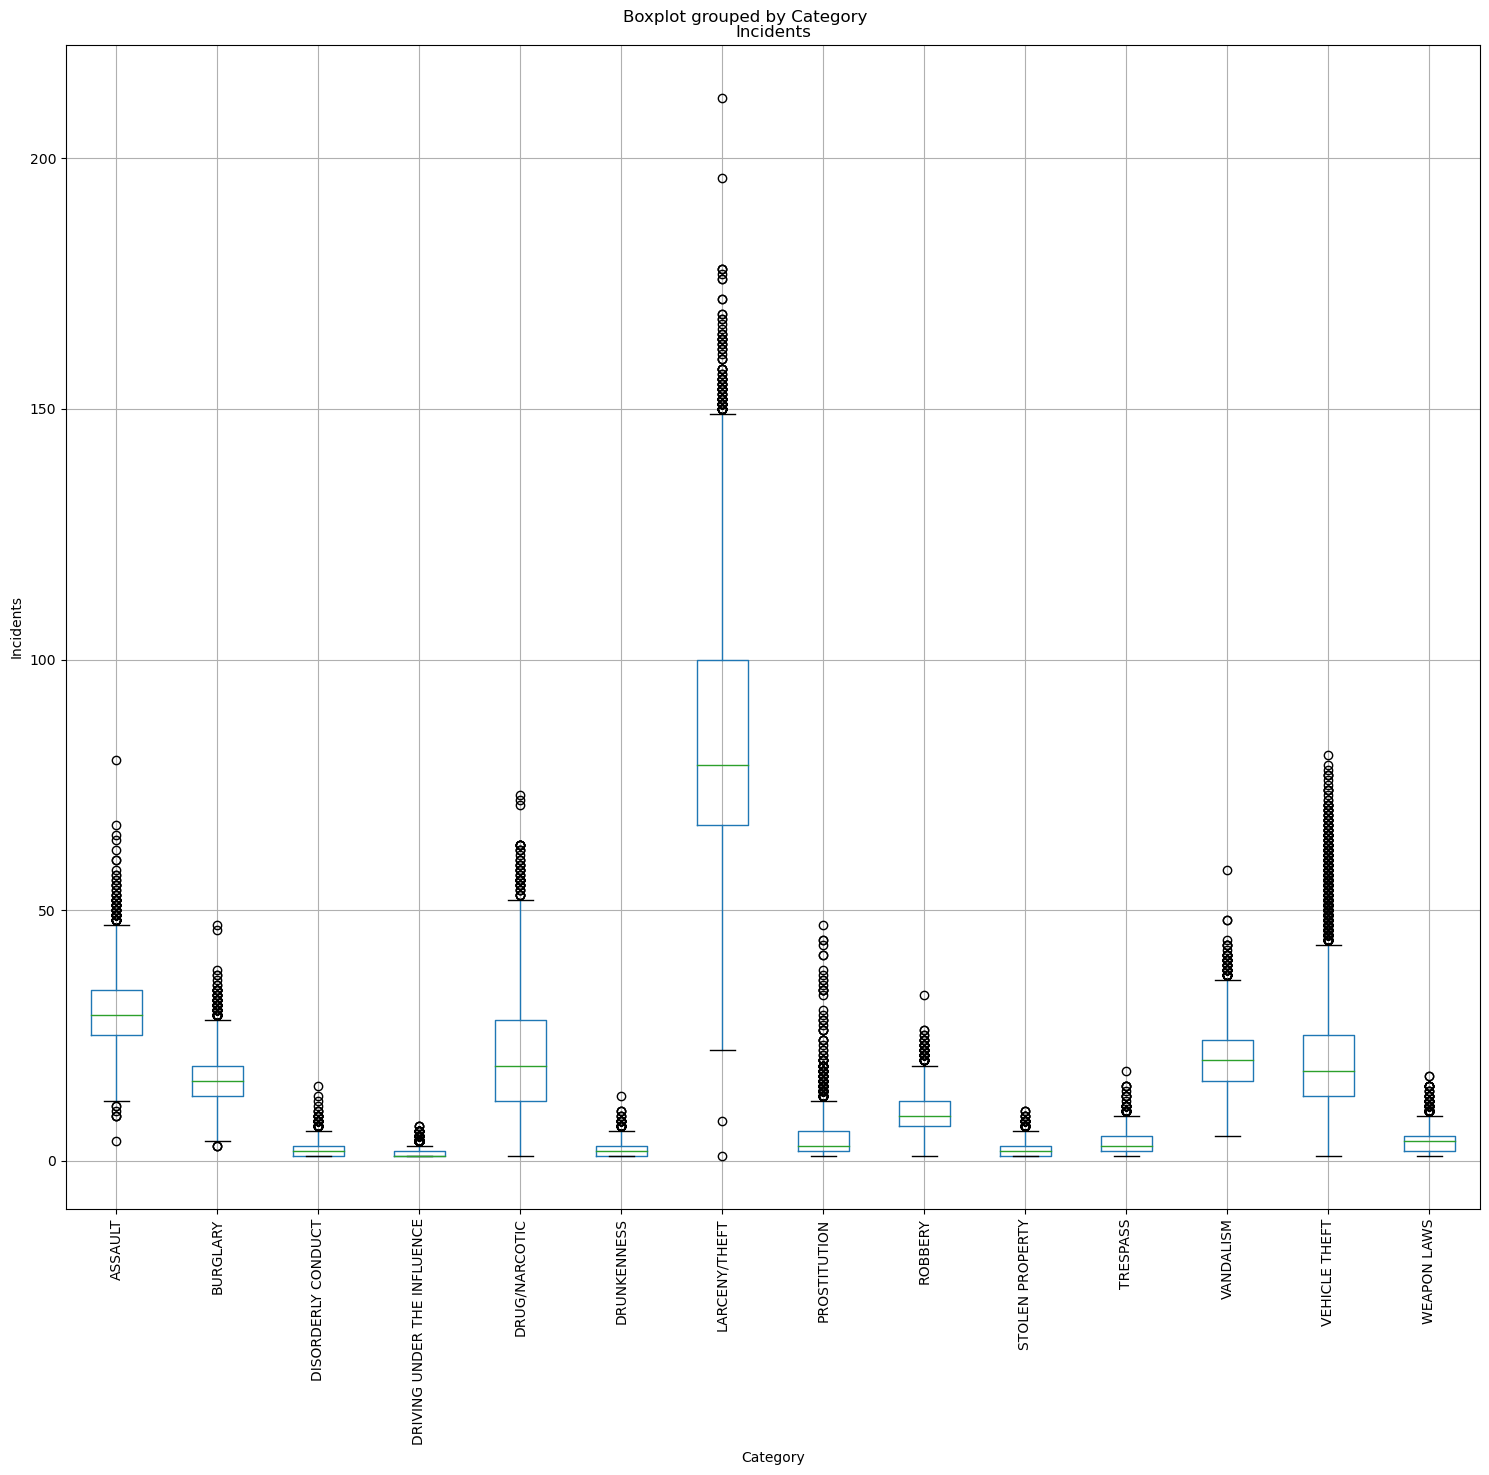

In [20]:
data = df
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])
data = data[data["Category"].isin(focuscrimes)]

crimes_per_day = data.groupby(['Category', 'Date']).size().reset_index(name = 'Incidents')
#print(crimes_per_day)

crimes_per_day.boxplot(by='Category', column='Incidents', figsize=(15,15))
plt.ylabel("Incidents")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

We can see that larceny/theft has so many reports each day that it enlarges the whole plot. But you can see this pretty clearly for the whole dataset. If we compare all the category counts in 

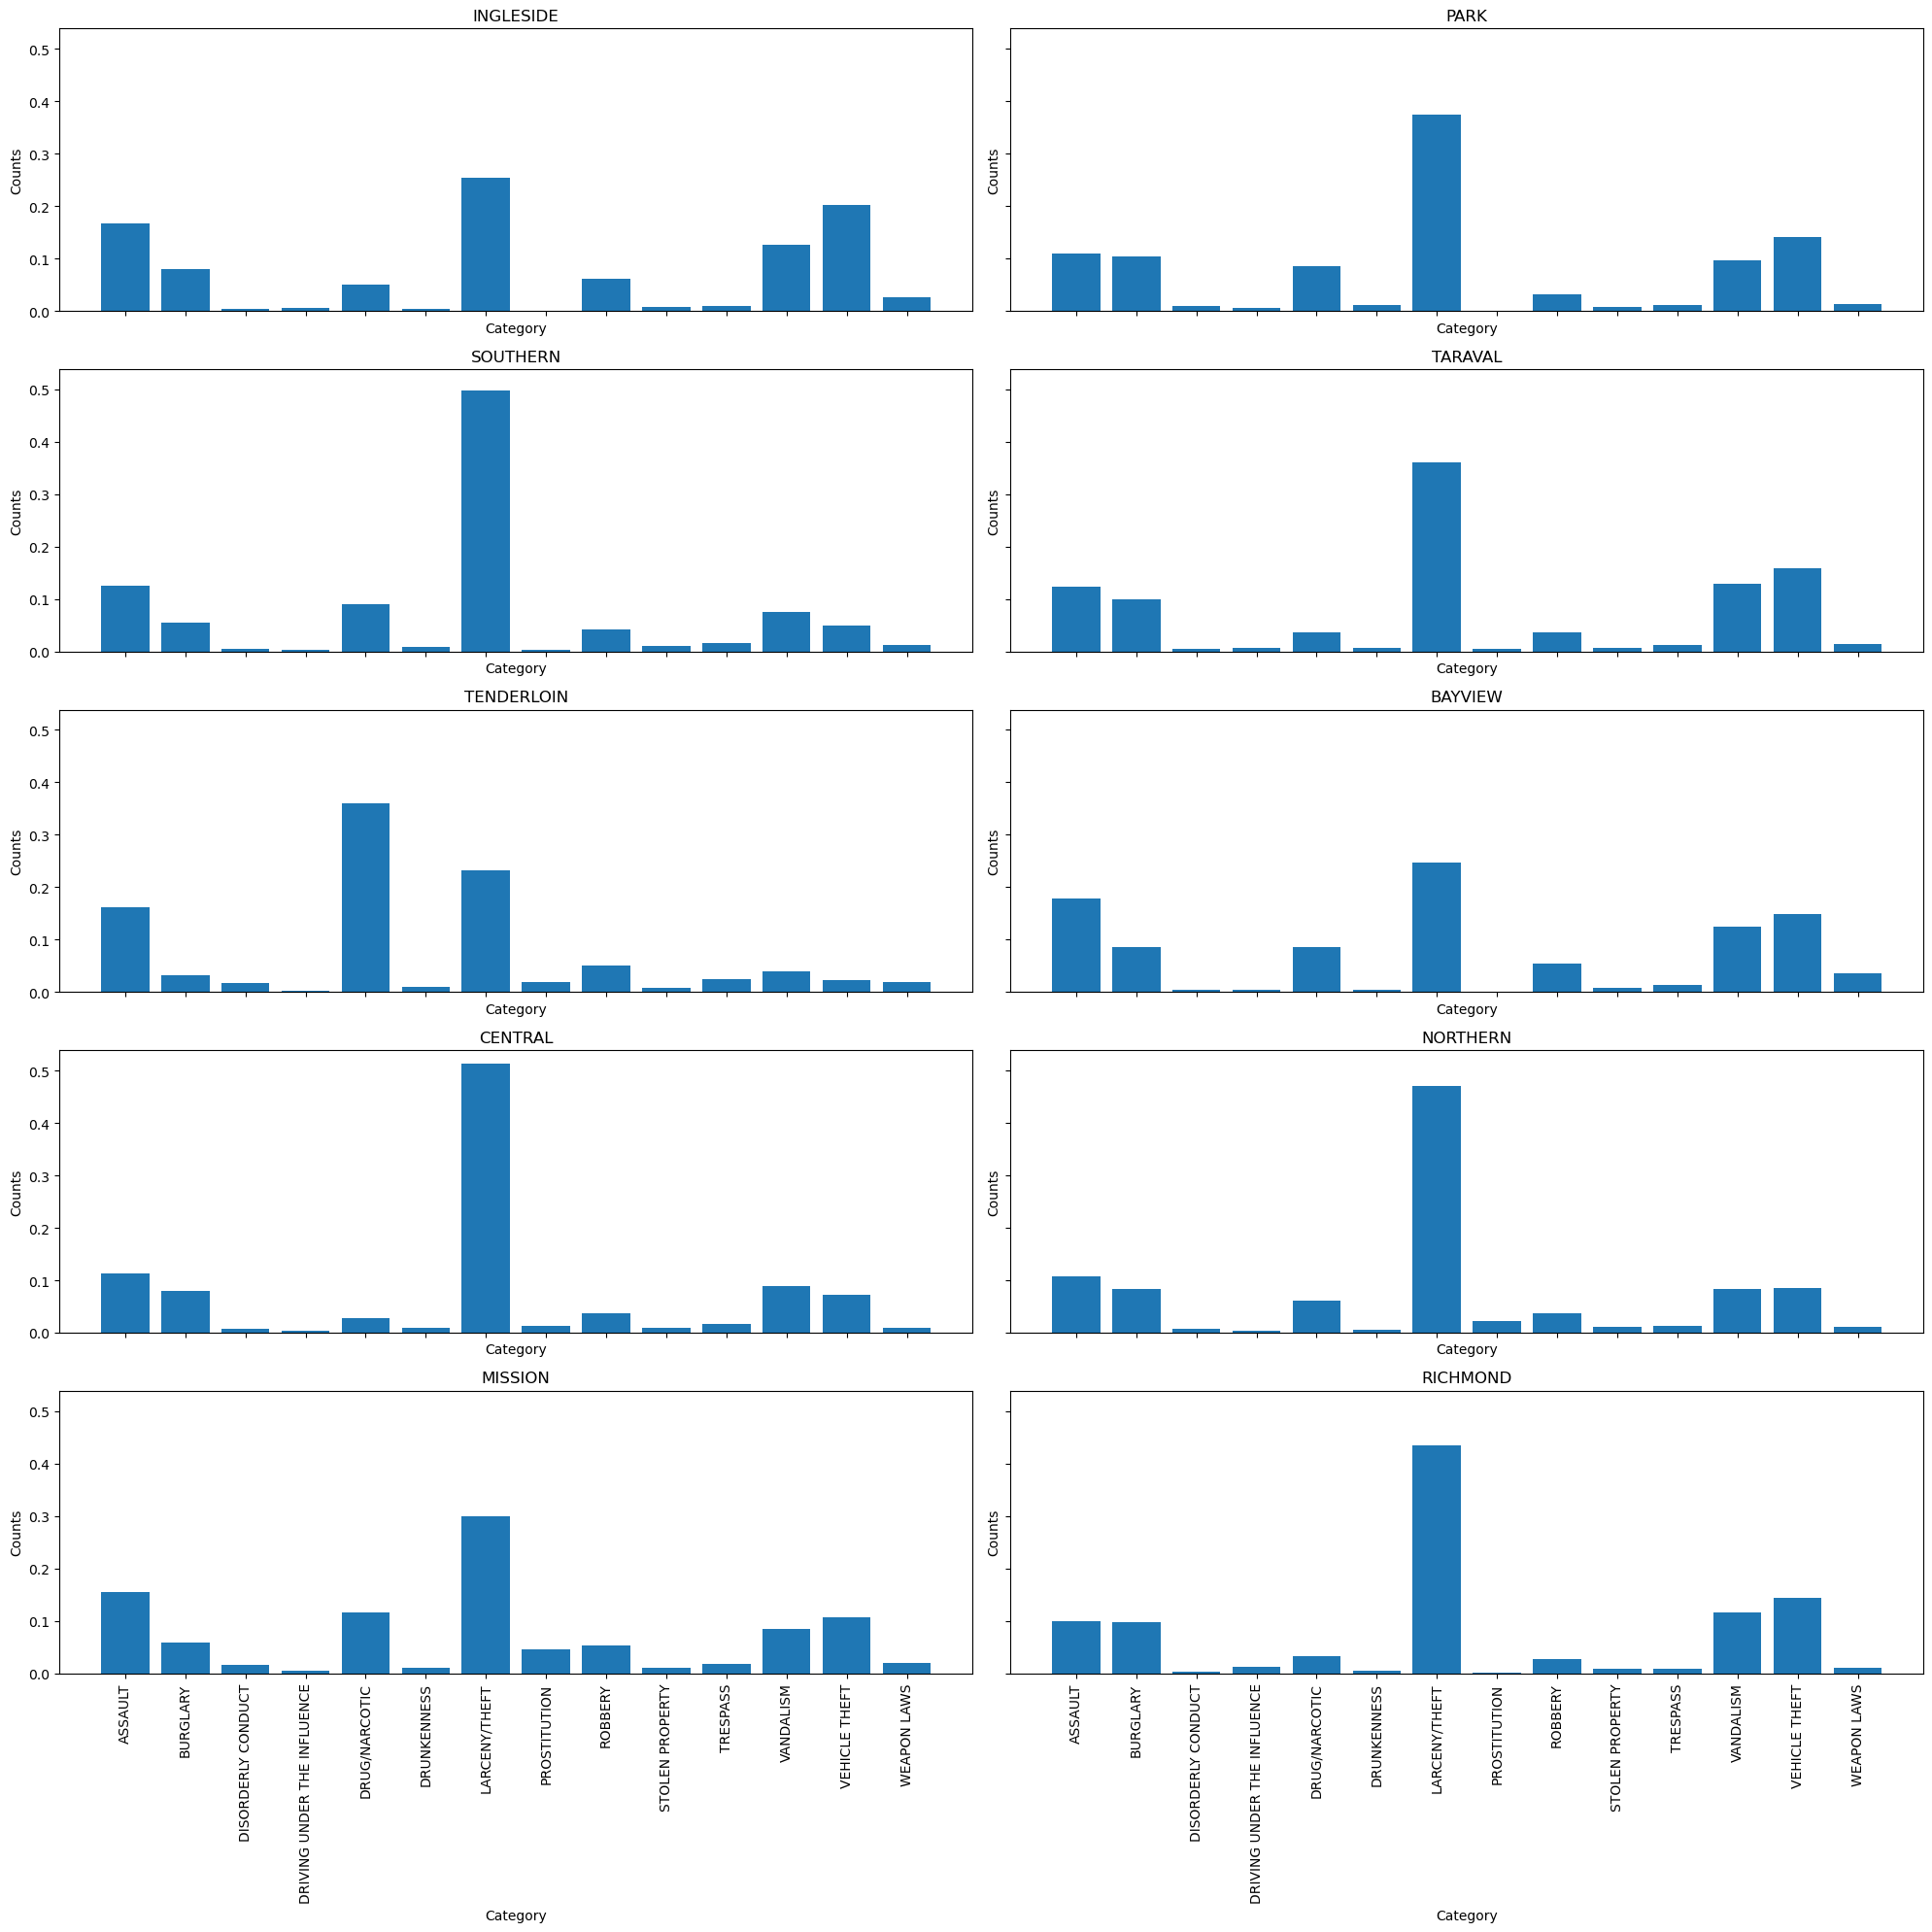

In [21]:
districts = data["PdDistrict"].dropna().unique()

nrows = 5
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 20), sharey=True, sharex=True)
axes = axes.flatten()

for i,district in enumerate(districts):
    crime_data = data[data["PdDistrict"] == district]
    crime_district_counts = crime_data["Category"].value_counts(normalize=True).sort_index()
    
    axes[i].bar(crime_district_counts.index,crime_district_counts.values)
    axes[i].set_title(district)
    axes[i].set_xlabel("Category")
    axes[i].set_ylabel("Counts")
    axes[i].tick_params('x',labelrotation=90)

plt.tight_layout()
plt.show()


This might have resulted especially from the years of 2015-2016, as seen in the calendar plot below

/var/folders/fk/jf1n3p615pj42c3yn8qkk3b80000gn/T/ipykernel_69114/1857008572.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Date"] = pd.to_datetime(data["Date"], yearfirst=True)


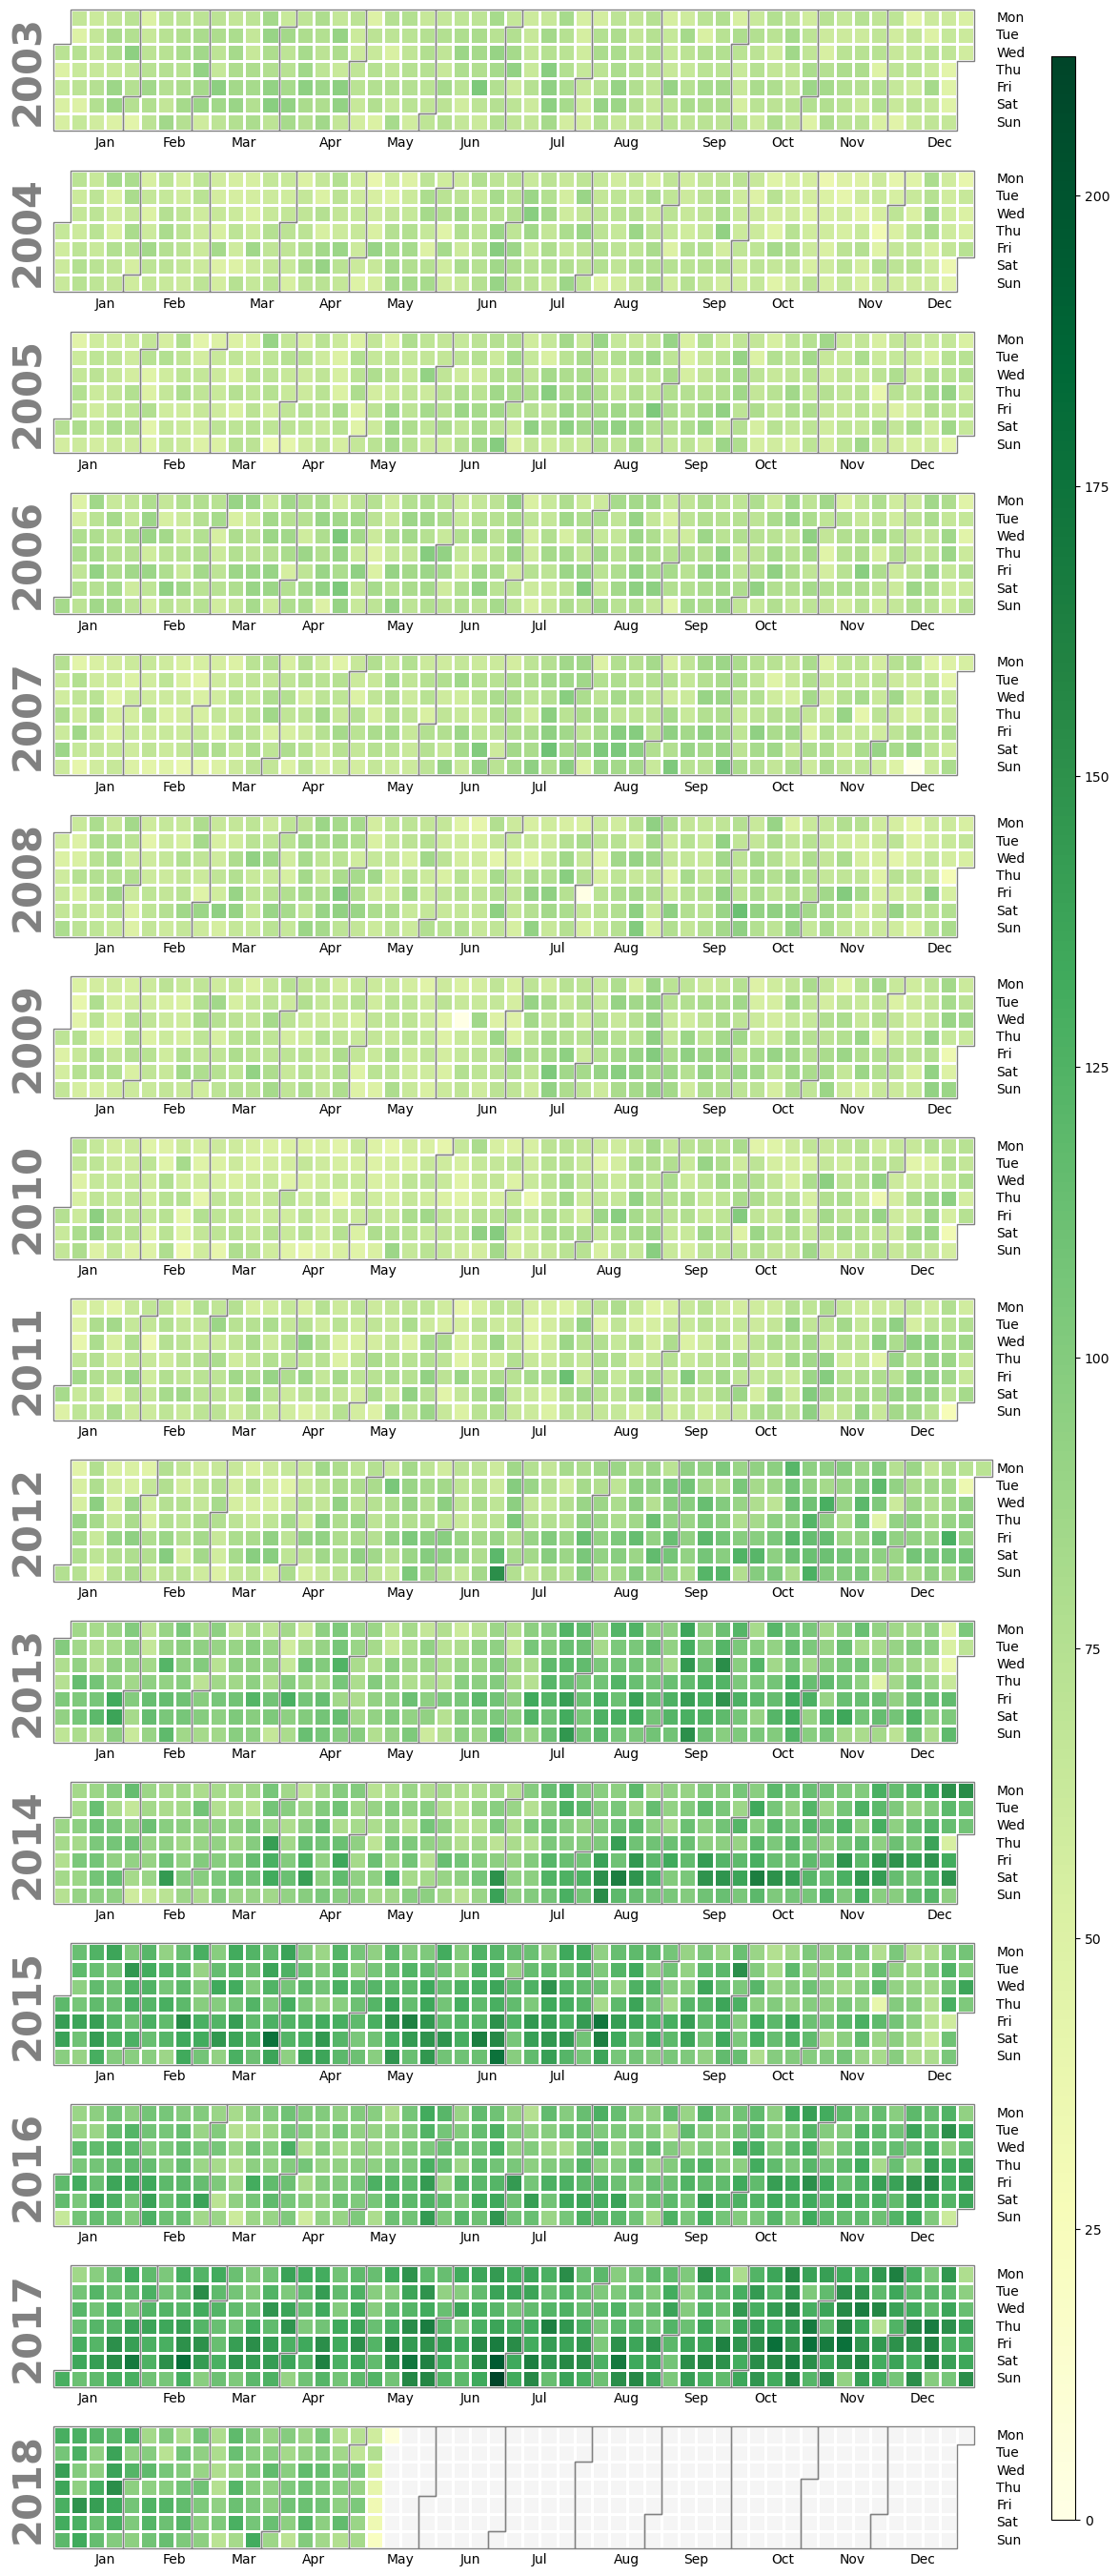

In [22]:
data["Date"] = pd.to_datetime(data["Date"], yearfirst=True)
data.set_index("Date", inplace=True)


category_data = data[data["Category"] == "LARCENY/THEFT"]

category_counts = category_data.resample("D").size()

calplot.calplot(category_counts, cmap='YlGn', yearlabel_kws={'fontname':'sans-serif'})
plt.show()

## LLMs

We found LLMs mostly useful as a guide. Most of the code we could write on our own, or using help from more traditional online resources. But especially when looking for examples of human noise, through conversations with the LLM and explaining our own thought process, we were able to come to a conclusion we were satisfied with.
Often with the code, minor mistakes were what the LLM could help with, such as getting an understanding of specific parameters a function might need to achieve a certain look or result.


# Contributions

| Part           | Contributor               | Student ID |
|----------------|---------------------------|------------|
| Part 1, Part 2 | Dimasha Nanayakkara       | s194710    |
| Part 3         | Ning Sun                  | s232171    |
| Part 4         | Max Heiberg Bestle        | s194574    |
